In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Exploración de datos
## a. Importar los datos obtenidos en la Feria de León 2025 a través de la página web Mapa de Bienestar

In [260]:
data = pd.read_csv('data/data-mapa-bienestar.csv')
data.head(5)

,id,age_years,country,municipality,name,sex,state,age_at_menarche_years,breast_cancer_first_degree_relatives,breathlessness_last_4_weeks,...,pack_years_value,pack_years_interpretation,sarcopenia_risk_value,sarcopenia_risk_interpretation,copd_risk_value,copd_risk_interpretation,ost_score_value,ost_score_interpretation,breast_cancer_risk_value,breast_cancer_risk_interpretation
0,1,80,México,León,Diego Cesar Lerma Torres,MALE,Guanajuato,NaN,NaN,NEVER,...,0.00,Riesgo Bajo de Enfermedad Pulmonar Obstructiva...,0,Sin riesgo de sarcopenia,0,Baja probabilidad de Enfermedad Pulmonar Obstr...,-5.0,Alto riesgo de osteoporosis,NaN,NaN
1,2,70,México,León,Diego Cesar Lerma Torres,MALE,Guanajuato,NaN,NaN,NEVER,...,0.00,Riesgo Bajo de Enfermedad Pulmonar Obstructiva...,0,Sin riesgo de sarcopenia,0,Baja probabilidad de Enfermedad Pulmonar Obstr...,NaN,NaN,NaN,NaN
2,3,20,México,Guanajuato,Brandon Lee Agüero Fernández,MALE,Guanajuato,NaN,NaN,NEVER,...,0.00,Riesgo Bajo de Enfermedad Pulmonar Obstructiva...,0,Sin riesgo de sarcopenia,0,Baja probabilidad de Enfermedad Pulmonar Obstr...,10.0,Bajo riesgo de osteoporosis,NaN,NaN
3,4,12,México,León,Jju,FEMALE,Guanajuato,MORE_THAN_13_YEARS,UNKNOWN,NEVER,...,0.25,Riesgo Bajo de Enfermedad Pulmonar Obstructiva...,0,Sin riesgo de sarcopenia,0,Baja probabilidad de Enfermedad Pulmonar Obstr...,NaN,NaN,NaN,NaN
4,493,45,México,León,Rendirá solano,FEMALE,Guanajuato,AGE_12_13_YEARS,ONE,NEVER,...,0.00,Riesgo Bajo de Enfermedad Pulmonar Obstructiva...,0,Sin riesgo de sarcopenia,0,Baja probabilidad de Enfermedad Pulmonar Obstr...,NaN,NaN,NaN,NaN


## b. Eliminar valores de prueba

In [261]:
nombres_de_prueba = ['Diego Lerma', 'Diego Cesar Lerma Torres', 'Brandon Lee Agüero Fernández', 'Brandon Lee Agüero Fernández ', 'Jju', 'Diego', 'Dgg', 'Skd', 'Libia Denisse']


In [334]:
data = data[~data['name'].isin(nombres_de_prueba)]

## c. Análisis exploratorio de datos

In [263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1556 entries, 4 to 1584
Data columns (total 83 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         1556 non-null   int64  
 1   age_years                                  1556 non-null   int64  
 2   country                                    1556 non-null   object 
 3   municipality                               1556 non-null   object 
 4   name                                       1489 non-null   object 
 5   sex                                        1556 non-null   object 
 6   state                                      1556 non-null   object 
 7   age_at_menarche_years                      925 non-null    object 
 8   breast_cancer_first_degree_relatives       925 non-null    object 
 9   breathlessness_last_4_weeks                1556 non-null   object 
 10  cigarettes_per_day           

In [264]:
data.describe()

,id,age_years,cigarettes_per_day,difficulty_carrying_weight,difficulty_climbing_stairs,difficulty_crossing_room,difficulty_rising_from_bed,falls_last_year,height_meters,moderate_activity_days,...,bee_basal,bee_total,ipaq_total_met_minutes,ipaq_total_calories,pack_years_value,sarcopenia_risk_value,copd_risk_value,ost_score_value,breast_cancer_risk_value,breast_cancer_risk_interpretation
count,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1441.000000,1556.000000,...,1.437000e+03,1.437000e+03,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1448.000000,0.0,0.0
mean,805.984576,31.809769,0.517352,0.019280,0.011568,0.001285,0.008355,0.020566,1.597127,1.583548,...,1.159844e+04,2.103797e+04,4566.544987,6232.624679,0.425386,0.061054,0.129820,155.444061,NaN,NaN
std,450.497210,16.440944,2.316519,0.167104,0.128788,0.035840,0.097859,0.146430,0.167525,1.914262,...,3.631813e+05,6.895130e+05,6350.240895,8667.948846,3.025269,0.431255,0.490276,5269.963706,NaN,NaN
min,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.440000,0.000000,...,5.171700e+02,8.016200e+02,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,NaN,NaN
25%,416.750000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.540000,0.000000,...,1.339430e+03,1.837220e+03,876.000000,1195.000000,0.000000,0.000000,0.000000,4.000000,NaN,NaN
50%,805.500000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.610000,1.000000,...,1.472540e+03,2.154820e+03,2455.500000,3351.000000,0.000000,0.000000,0.000000,7.000000,NaN,NaN
75%,1196.250000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.700000,3.000000,...,1.681560e+03,2.590920e+03,5653.750000,7716.750000,0.000000,0.000000,0.000000,9.000000,NaN,NaN
max,1585.000000,152.000000,45.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,7.000000,...,1.375092e+07,2.612674e+07,69095.000000,94314.000000,67.500000,6.000000,6.000000,199997.000000,NaN,NaN


# 2. Preprocesamiento de datos
## a. Separar los datos que están en objetos en columnas independientes

Estos son:
- bee_activity
- ipaq_activities
- ipaq_sedentary_time







In [265]:
def parse_json_column(series, prefix, keys, is_list=False, max_list_elements=None):
    import json
    import pandas as pd

    def parse_value(x):
        # Si el valor es NaN o no es una cadena, se retorna una lista o diccionario vacío según el caso
        if pd.isna(x) or not isinstance(x, str):
            return [] if is_list else {}
        try:
            return json.loads(x)
        except (json.JSONDecodeError, TypeError):
            return [] if is_list else {}

    if is_list and max_list_elements is None:
        def safe_len(x):
            parsed = parse_value(x)
            return len(parsed) if isinstance(parsed, list) else 0
        # Se calcula el máximo y se fuerza la conversión a entero; si no se obtiene un valor se asigna 0.
        max_len = series.apply(safe_len).max()
        max_list_elements = int(max_len) if max_len is not None else 0

    new_data = []
    for value in series:
        parsed = parse_value(value)
        if not is_list:
            # Caso: objeto JSON (diccionario)
            row = {f"{prefix}_{key}": parsed.get(key) if isinstance(parsed, dict) else None for key in keys}
        else:
            # Caso: lista de diccionarios
            row = {}
            if isinstance(parsed, list):
                for i in range(max_list_elements):
                    if i < len(parsed) and isinstance(parsed[i], dict):
                        for key in keys:
                            row[f"{prefix}_{i+1}_{key}"] = parsed[i].get(key)
                    else:
                        for key in keys:
                            row[f"{prefix}_{i+1}_{key}"] = None
            else:
                for i in range(max_list_elements):
                    for key in keys:
                        row[f"{prefix}_{i+1}_{key}"] = None
        new_data.append(row)

    return pd.DataFrame(new_data, index=series.index)

In [266]:
# 1. Parsear bee_activity (objeto JSON)
df_bee = parse_json_column(data['bee_activity'], "bee_activity", ["level", "factor", "description"], is_list=False)

# 2. Parsear ipaq_activities (lista de diccionarios)
df_ipaq = parse_json_column(data['ipaq_activities'], "ipaq_activities", ["name", "met_minutes", "calories"], is_list=True)

# 3. Parsear ipaq_sedentary_time (objeto JSON)
df_sedentary = parse_json_column(data['ipaq_sedentary_time'], "ipaq_sedentary_time", ["hours", "minutes"], is_list=False)

# Combinar las nuevas columnas con el DataFrame original (opcional)
data = pd.concat([data, df_bee, df_ipaq, df_sedentary], axis=1)


# 3. Análisis de Datos

## a. Análisis de edad

In [268]:
data.age_years.describe()

count    1556.000000
mean       31.809769
std        16.440944
min         3.000000
25%        17.000000
50%        31.000000
75%        43.000000
max       152.000000
Name: age_years, dtype: float64

/tmp/ipykernel_42233/2872537957.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette="viridis")


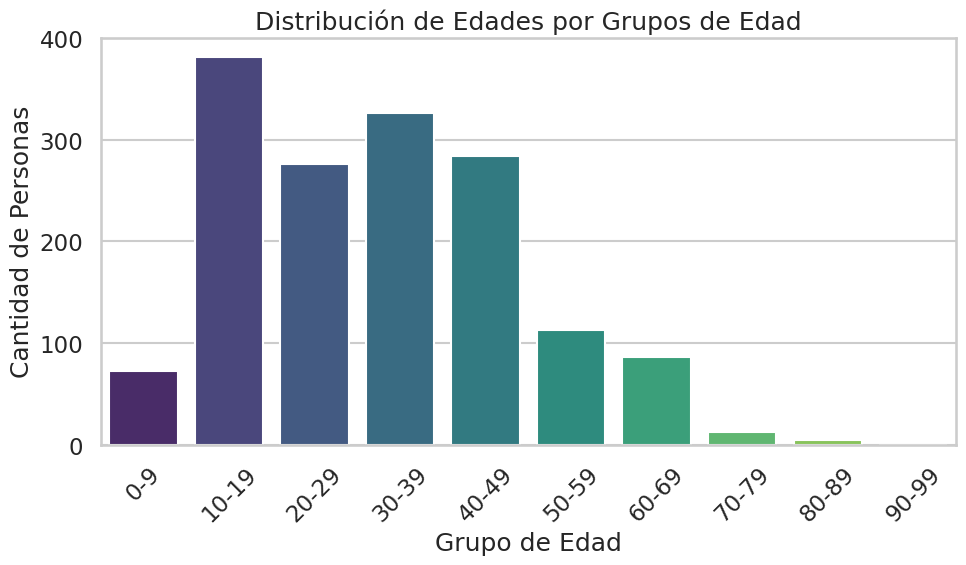

In [269]:
# Definir los límites de los intervalos (bins).
# Se asume que las edades varían entre 0 y 100, lo cual es suficiente para el rango observado (min: 3, max: 152)
bins = list(range(0, 101, 10))
# Crear etiquetas para los grupos, por ejemplo "0-9", "10-19", etc.
labels = [f"{b}-{b+9}" for b in bins[:-1]]

# Crear la columna 'age_group' usando pd.cut con los intervalos definidos.
# Aquí se usa right=False para que los intervalos incluyan el límite inferior y excluyan el superior,
# de forma que 0-9 incluya las edades entre 0 y 9.
data['age_group'] = pd.cut(data['age_years'], bins=bins, labels=labels, right=False, include_lowest=True)

# Contar el número de personas en cada grupo de edad y ordenar los grupos por orden natural (de menor a mayor edad).
age_group_counts = data['age_group'].value_counts().sort_index()

# Graficar la distribución usando un gráfico de barras.
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette="viridis")
plt.title("Distribución de Edades por Grupos de Edad")
plt.xlabel("Grupo de Edad")
plt.ylabel("Cantidad de Personas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## b. Análisis de ubicación geográfica

In [270]:
def plot_category_counts(data, column, title, xlabel, ylabel, 
                         figsize=(10, 6), rotation=45, ha='center', 
                         use_hue=False, dodge=False, palette="viridis"):
    """
    Genera un gráfico de barras que muestra la distribución de valores de una columna categórica
    y muestra el porcentaje sobre cada barra.

    Parámetros:
    - data: DataFrame de pandas que contiene la columna.
    - column: Nombre de la columna a analizar.
    - title: Título del gráfico.
    - xlabel: Etiqueta del eje x.
    - ylabel: Etiqueta del eje y.
    - figsize: Tamaño de la figura (tupla), por defecto (10,6).
    - rotation: Ángulo de rotación de las etiquetas en el eje x, por defecto 45.
    - ha: Alineación horizontal de las etiquetas del eje x.
    - use_hue: Si es True, se asigna el mismo valor de la categoría a 'hue'; por ejemplo, para diferenciarlas en color.
    - dodge: Parámetro que se pasa a seaborn.barplot (útil cuando se usa hue).
    - palette: Paleta de colores para el gráfico.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Se calcula la cantidad de ocurrencias de cada valor.
    counts = data[column].value_counts()
    total = counts.sum()
    max_height = counts.max() if counts.max() != 0 else 1
    offset = max_height * 0.01  # Pequeño offset para posicionar el porcentaje por encima de la barra

    plt.figure(figsize=figsize)
    if use_hue:
        ax = sns.barplot(
            x=counts.index,
            y=counts.values,
            hue=counts.index,
            dodge=dodge,
            palette=palette
        )
        # Remover la leyenda para mayor claridad
        legend = ax.get_legend()
        if legend is not None:
            legend.remove()
    else:
        # Para evitar el warning, se obtiene un solo color de la paleta
        single_color = sns.color_palette(palette)[0]
        ax = sns.barplot(
            x=counts.index,
            y=counts.values,
            color=single_color
        )
    
    # Mostrar el porcentaje sobre cada barra
    for bar in ax.patches:
        height = bar.get_height()
        percentage = (height / total) * 100
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            height + offset, 
            f'{percentage:.1f}%', 
            ha='center', 
            va='bottom', 
            fontsize=10,
            color='black'
        )
    
    plt.title(title, pad=20)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation, ha=ha)
    plt.tight_layout()
    plt.show()

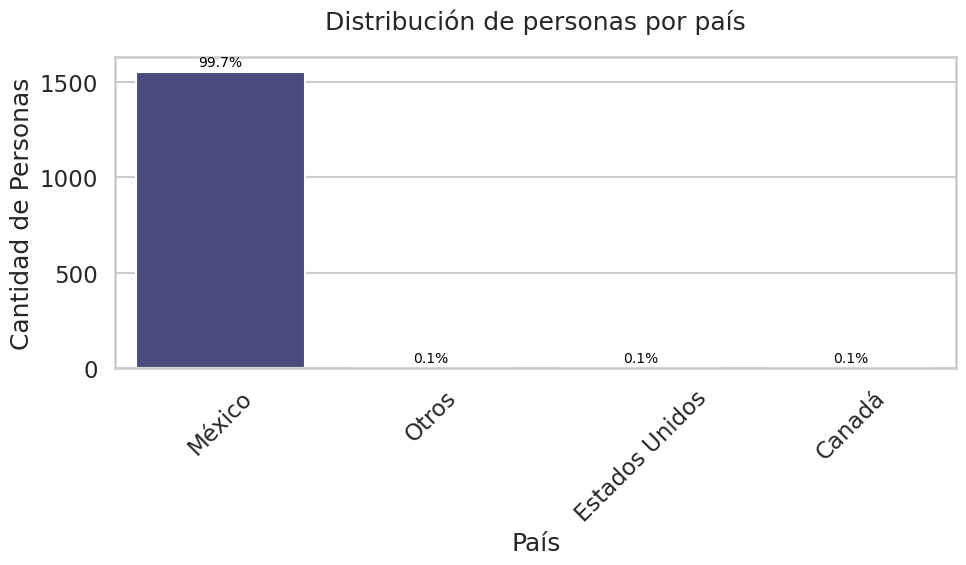

In [271]:
# Distribución de personas por país
plot_category_counts(
    data, 
    column='country', 
    title="Distribución de personas por país", 
    xlabel="País", 
    ylabel="Cantidad de Personas", 
    figsize=(10,6), 
    rotation=45, 
    ha='center', 
    use_hue=True,
    dodge=False
)

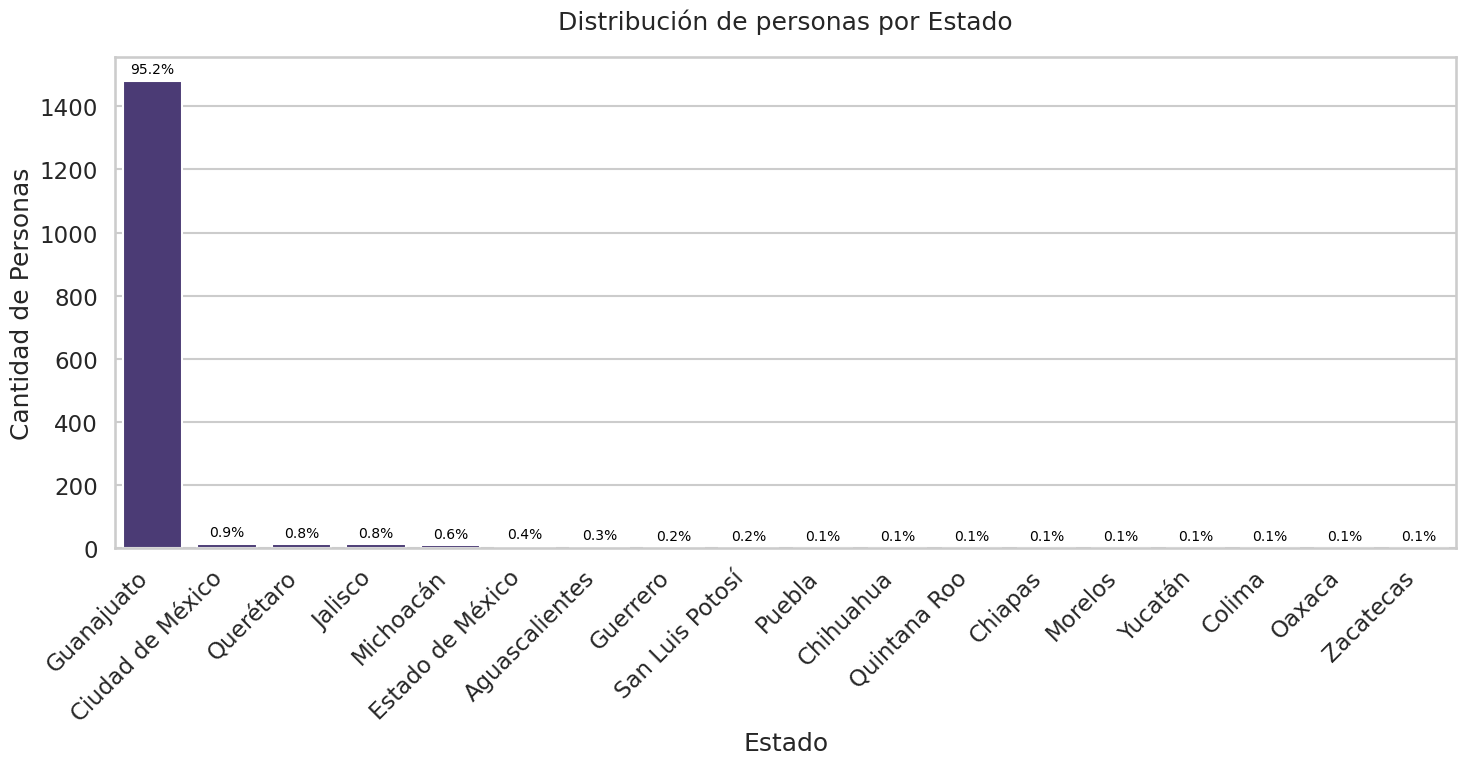

In [272]:
# Distribución de personas por estado
plot_category_counts(
    data, 
    column='state', 
    title="Distribución de personas por Estado", 
    xlabel="Estado", 
    ylabel="Cantidad de Personas", 
    figsize=(15,8), 
    rotation=45, 
    ha='right', 
    use_hue=False
)

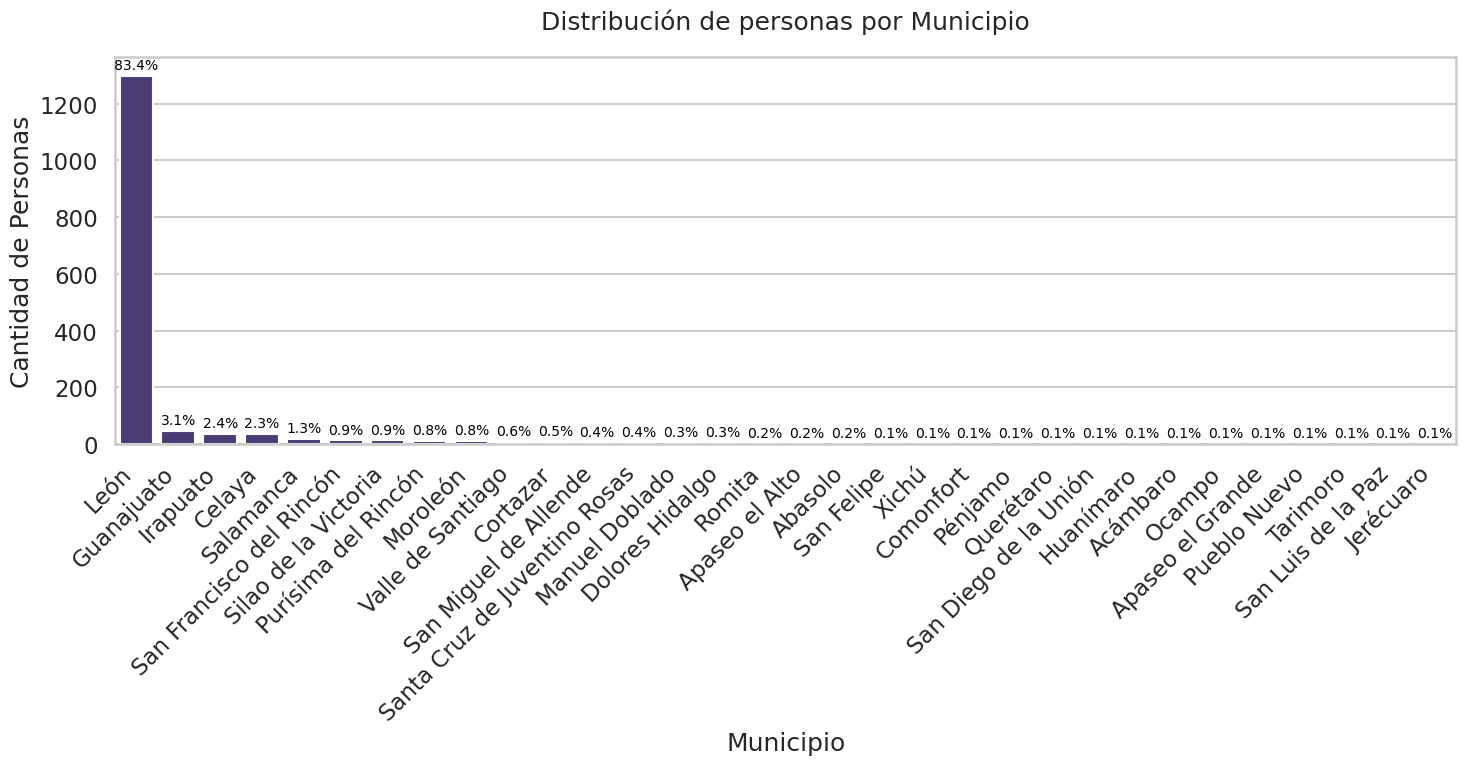

In [273]:
# Distribución de personas por municipio
plot_category_counts(
    data, 
    column='municipality', 
    title="Distribución de personas por Municipio", 
    xlabel="Municipio", 
    ylabel="Cantidad de Personas", 
    figsize=(15,8), 
    rotation=45, 
    ha='right', 
    use_hue=False
)

## c. Análisis por sexo y etnicidad

In [274]:
data.sex.value_counts()

sex
FEMALE    925
MALE      631
Name: count, dtype: int64

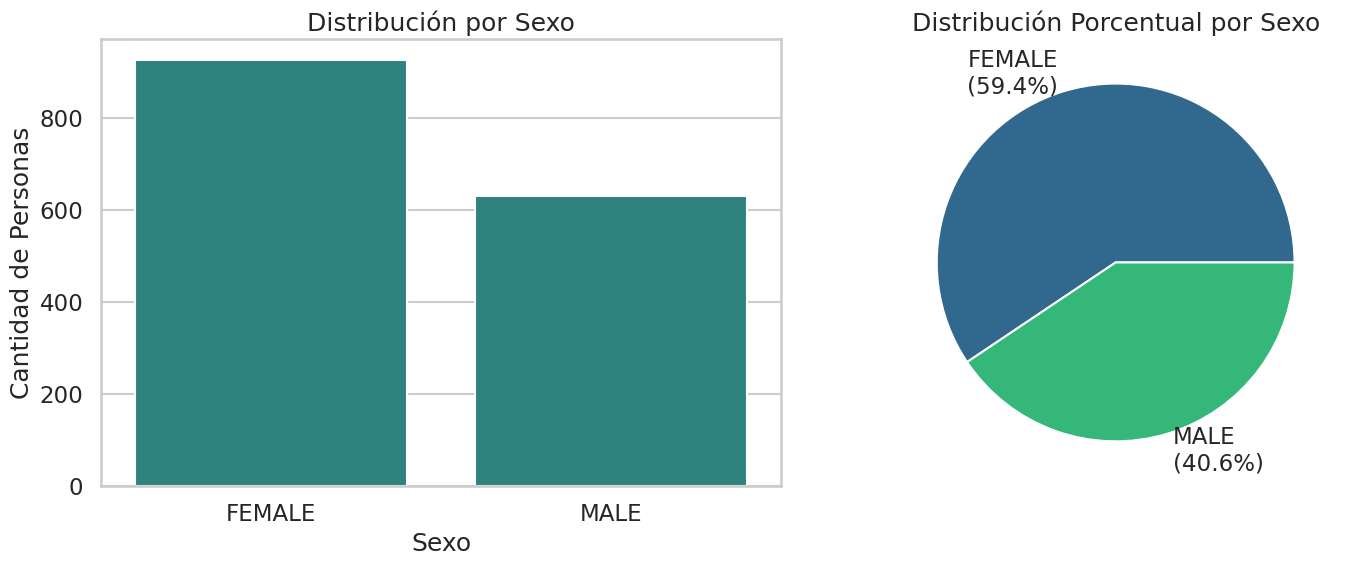


Distribución por sexo:
FEMALE: 925 personas (59.4%)
MALE: 631 personas (40.6%)


In [275]:
# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Gráfico de barras para distribución por sexo
sex_counts = data['sex'].value_counts()
single_color = sns.color_palette("viridis", 1)[0]
sns.barplot(
    x=sex_counts.index,
    y=sex_counts.values,
    ax=ax1,
    color=single_color  # Usamos 'color' en lugar de 'palette'
)
ax1.set_title("Distribución por Sexo")
ax1.set_xlabel("Sexo")
ax1.set_ylabel("Cantidad de Personas")

# 2. Gráfico de pastel para la distribución porcentual por sexo
sex_percentages = (sex_counts / len(data) * 100).round(1)
ax2.pie(
    sex_percentages,
    labels=[f'{idx}\n({val}%)' for idx, val in sex_percentages.items()],
    autopct='',
    colors=sns.color_palette("viridis", n_colors=len(sex_counts))
)
ax2.set_title("Distribución Porcentual por Sexo")

plt.tight_layout()
plt.show()

print("\nDistribución por sexo:")
for sex, count in sex_counts.items():
    # Se utiliza .at para acceder a un valor escalar sin problemas con los tipos
    percentage = sex_percentages.at[sex]
    print(f"{sex}: {count} personas ({percentage}%)")

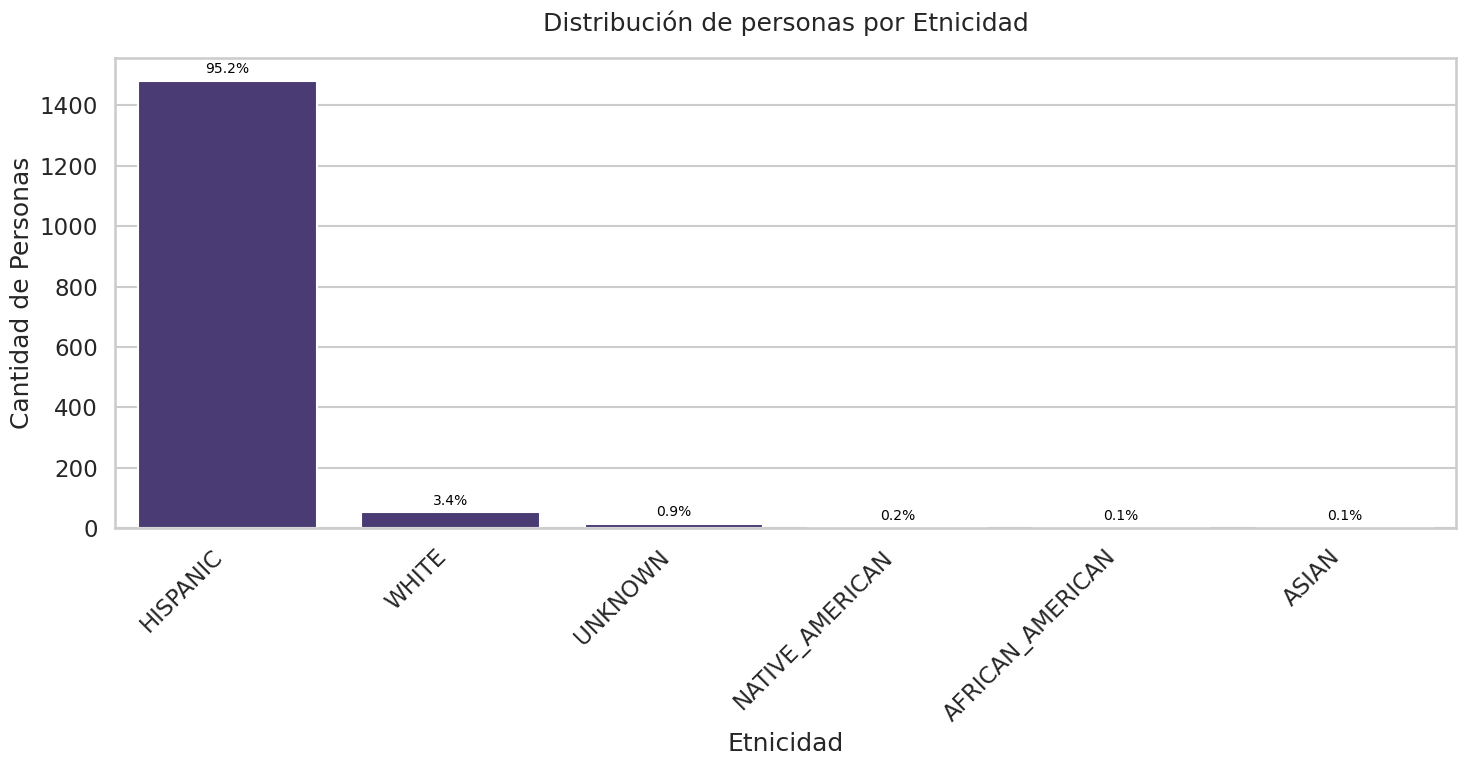

In [276]:
# Distribución de personas por municipio
plot_category_counts(
    data, 
    column='ethnicity', 
    title="Distribución de personas por Etnicidad", 
    xlabel="Etnicidad", 
    ylabel="Cantidad de Personas", 
    figsize=(15,8), 
    rotation=45, 
    ha='right', 
    use_hue=False
)

## d. Análisis por datos de género

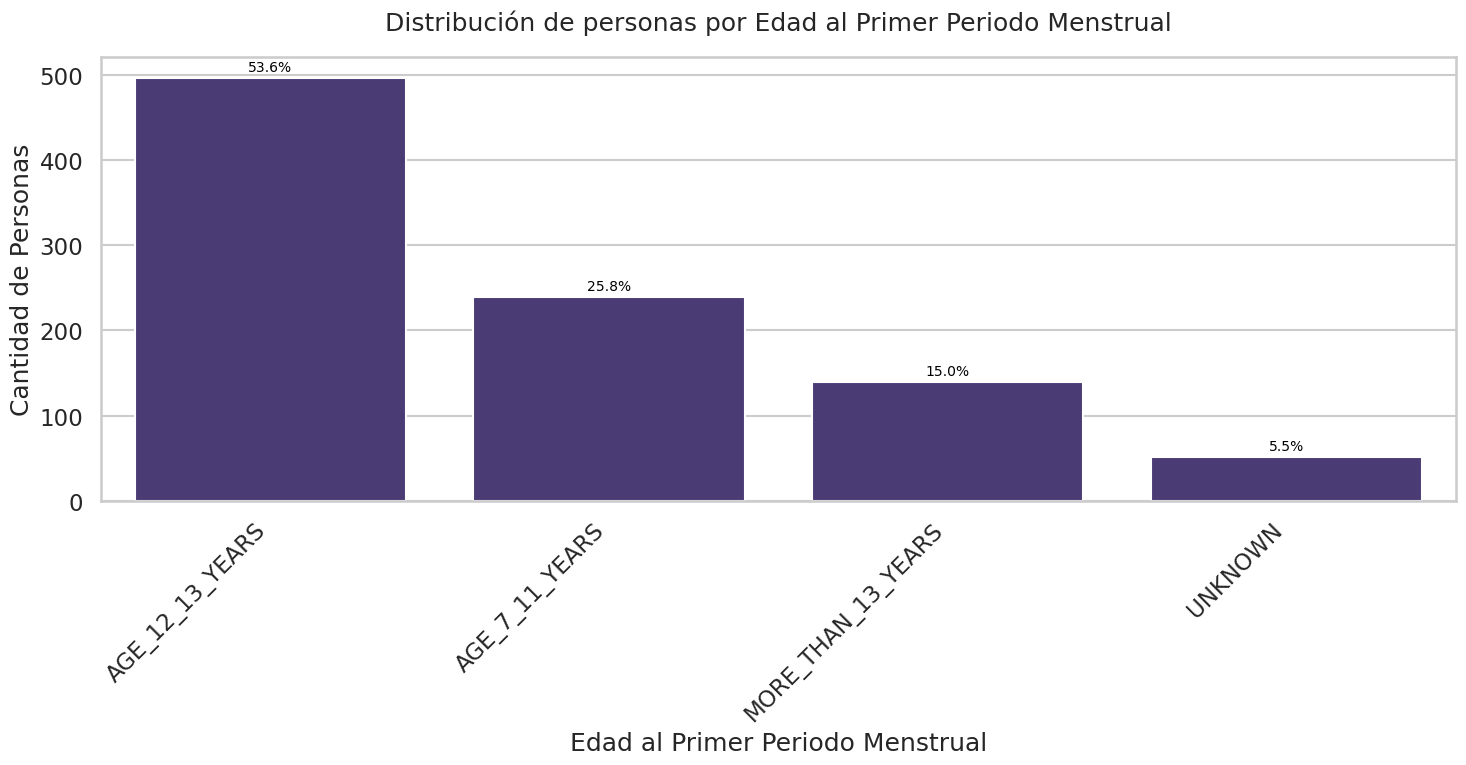

In [277]:
plot_category_counts(
    data, 
    column='age_at_menarche_years', 
    title="Distribución de personas por Edad al Primer Periodo Menstrual", 
    xlabel="Edad al Primer Periodo Menstrual", 
    ylabel="Cantidad de Personas", 
    figsize=(15,8), 
    rotation=45, 
    ha='right', 
    use_hue=False
)

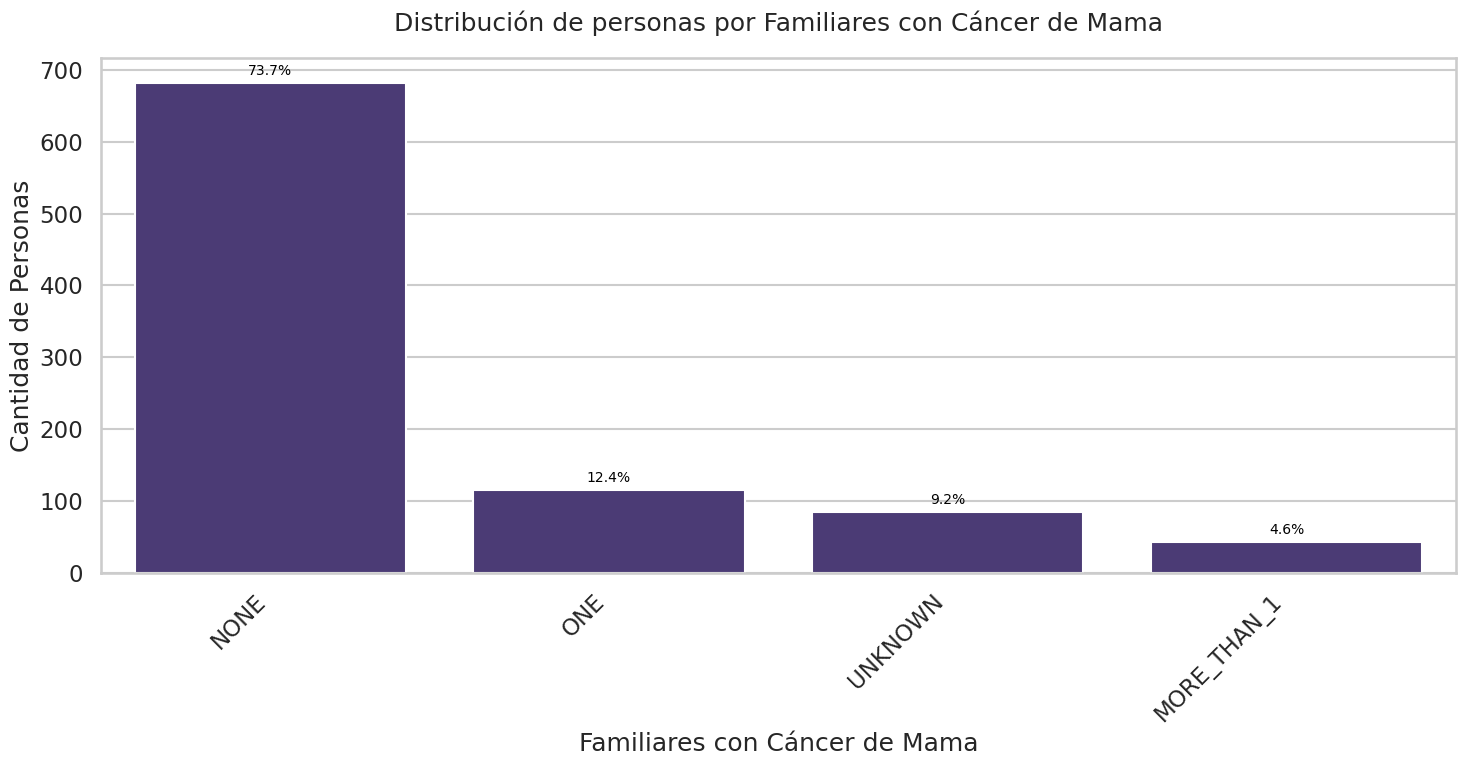

In [278]:
plot_category_counts(
    data, 
    column='breast_cancer_first_degree_relatives', 
    title="Distribución de personas por Familiares con Cáncer de Mama", 
    xlabel="Familiares con Cáncer de Mama", 
    ylabel="Cantidad de Personas", 
    figsize=(15,8), 
    rotation=45, 
    ha='right', 
    use_hue=False
)

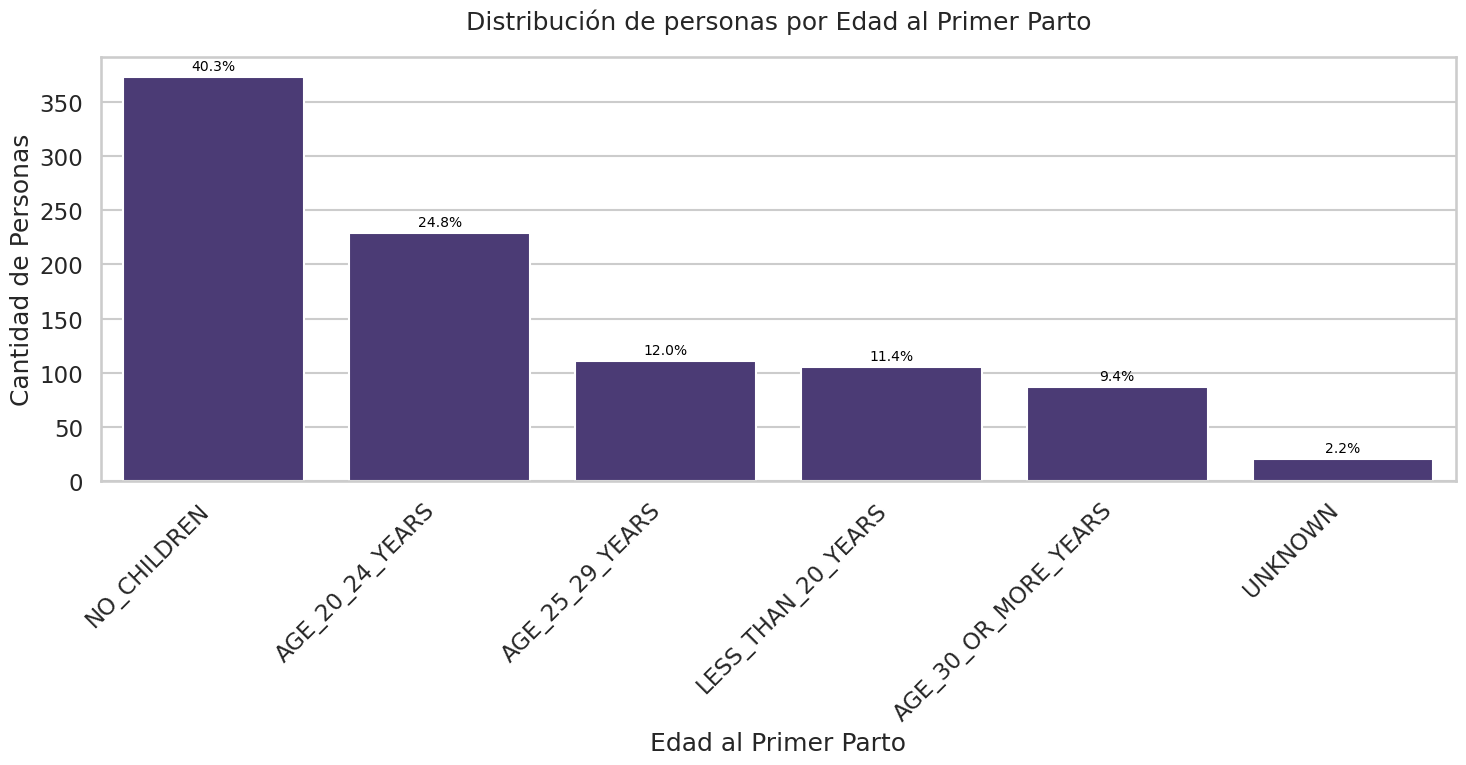

In [279]:
plot_category_counts(
    data, 
    column='maternal_first_birth_age', 
    title="Distribución de personas por Edad al Primer Parto", 
    xlabel="Edad al Primer Parto", 
    ylabel="Cantidad de Personas", 
    figsize=(15,8), 
    rotation=45, 
    ha='right', 
    use_hue=False
)

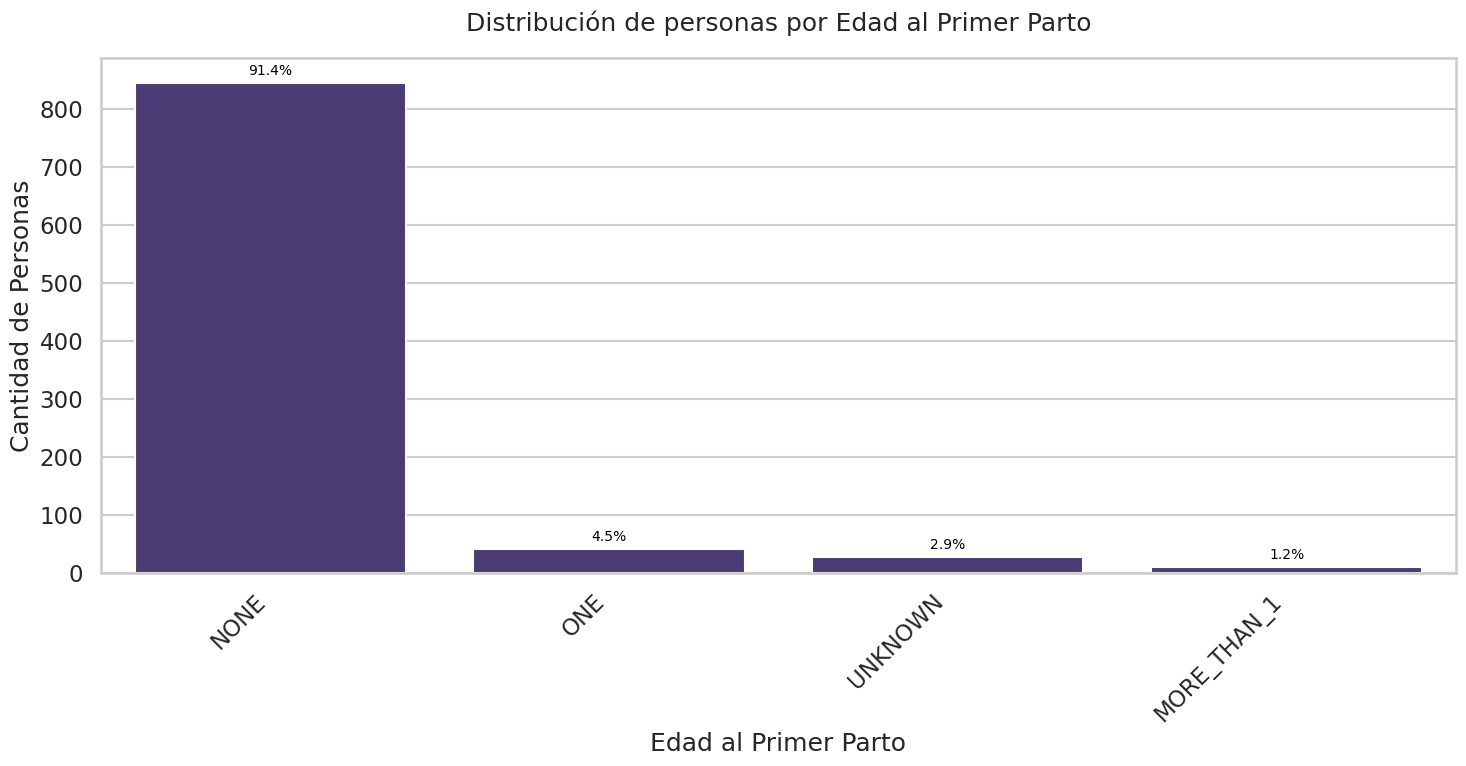

In [280]:
plot_category_counts(
    data, 
    column='previous_breast_biopsies', 
    title="Distribución de personas por Edad al Primer Parto", 
    xlabel="Edad al Primer Parto", 
    ylabel="Cantidad de Personas", 
    figsize=(15,8), 
    rotation=45, 
    ha='right', 
    use_hue=False
)

## e. Análisis por datos de tabaquismo

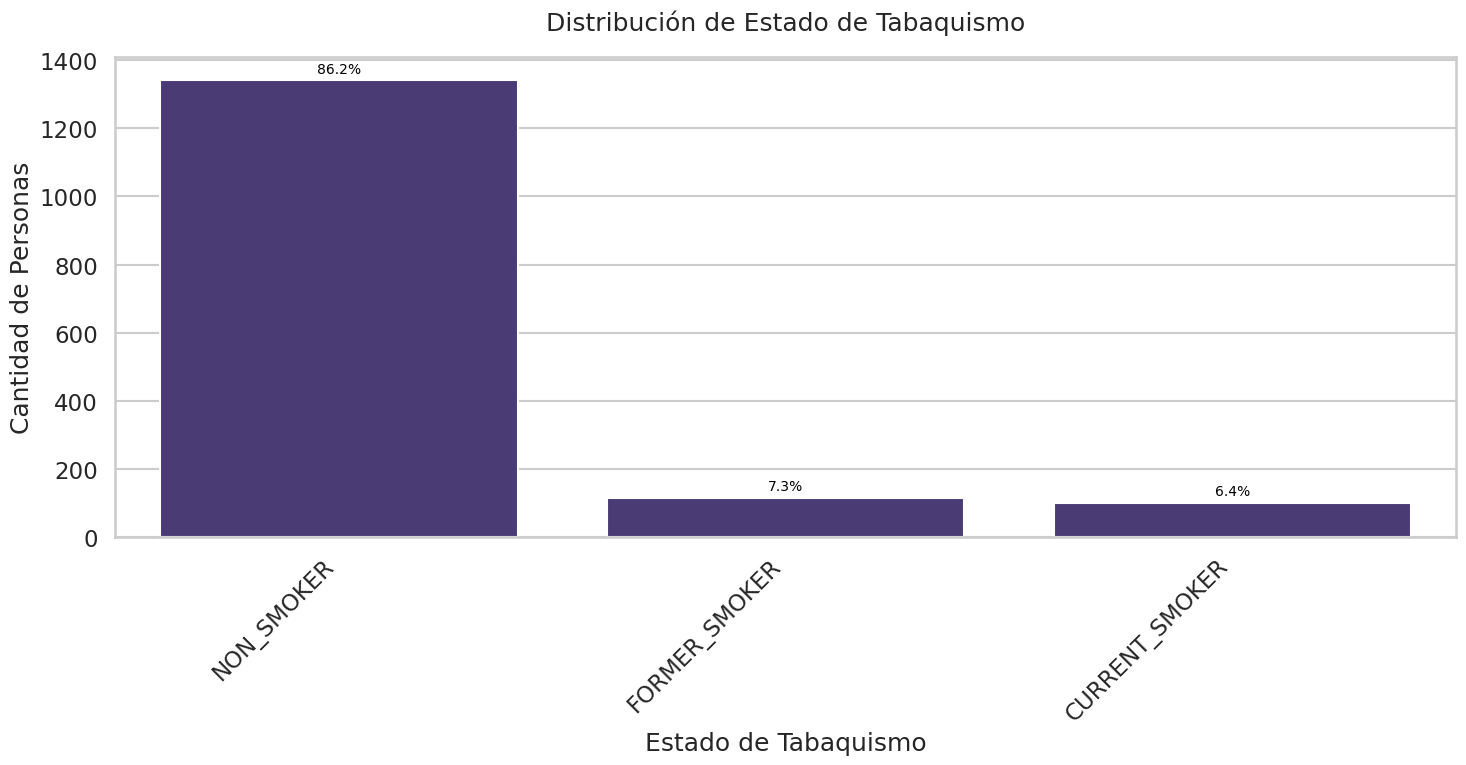

In [281]:
plot_category_counts(
    data, 
    column='smoking_status', 
    title="Distribución de Estado de Tabaquismo", 
    xlabel="Estado de Tabaquismo", 
    ylabel="Cantidad de Personas", 
    figsize=(15,8), 
    rotation=45, 
    ha='right', 
    use_hue=False
)

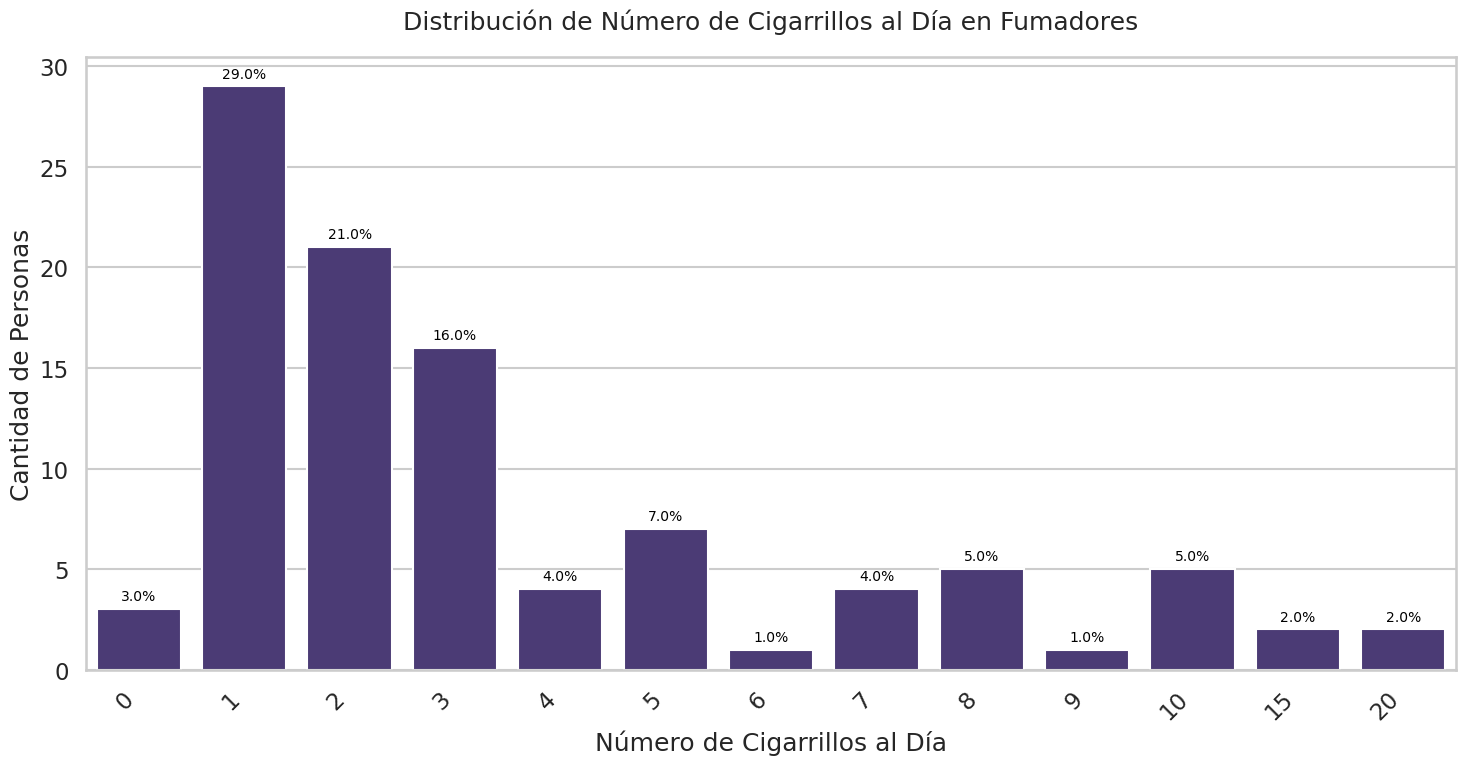

In [282]:
# Distribución de personas por número de cigarrillos al día contemplando solo el universo de fumadores (smoking_status == 'CURRENT_SMOKER')
data_active_smokers = data[data['smoking_status'].isin(['CURRENT_SMOKER'])]

plot_category_counts(
    data_active_smokers, 
    column='cigarettes_per_day', 
    title="Distribución de Número de Cigarrillos al Día en Fumadores", 
    xlabel="Número de Cigarrillos al Día", 
    ylabel="Cantidad de Personas", 
    figsize=(15,8), 
    rotation=45, 
    ha='right', 
    use_hue=False
)

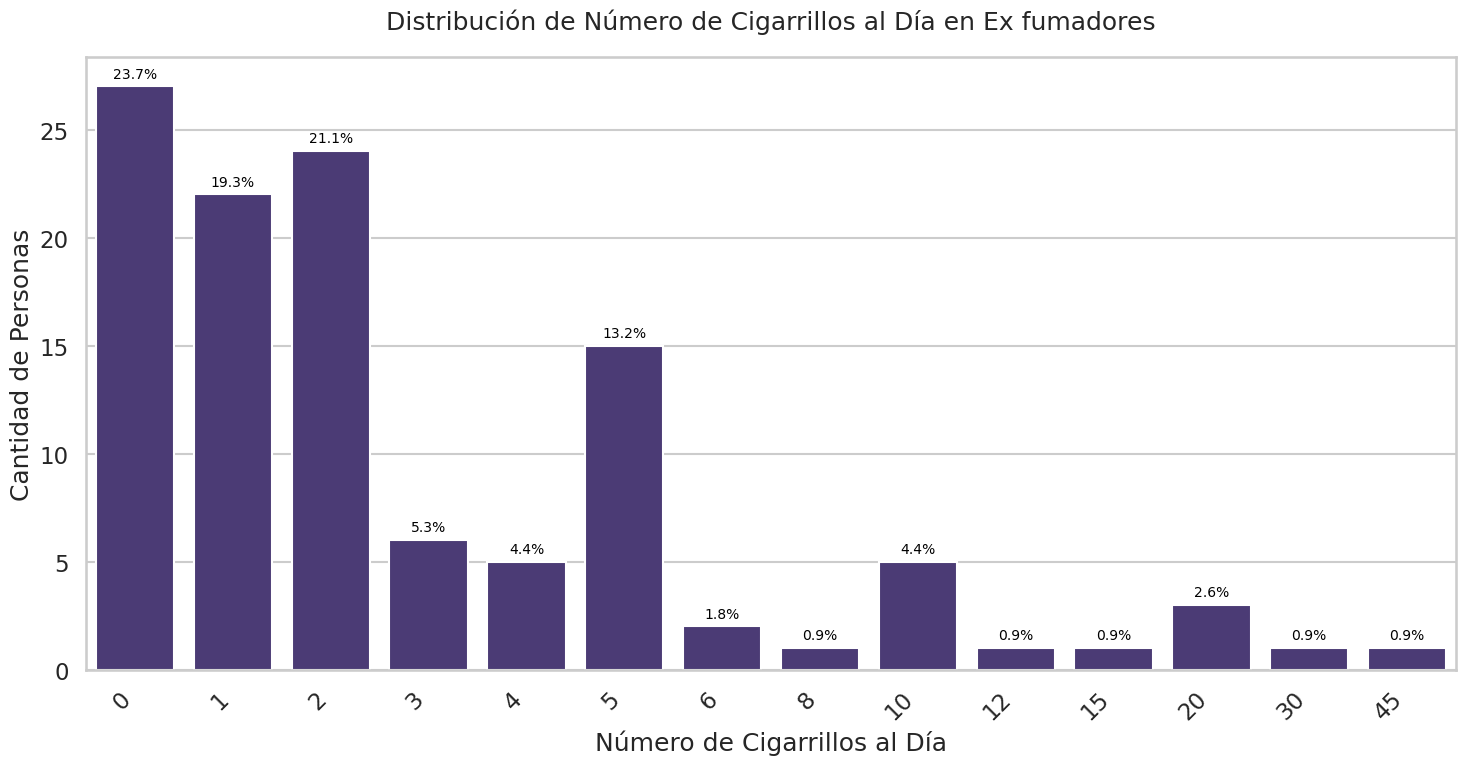

In [283]:
# Distribución de personas por número de cigarrillos al día contemplando solo el universo de ex fumadores (smoking_status == 'FORMER_SMOKER')
data_former_smokers = data[data['smoking_status'].isin(['FORMER_SMOKER'])]

plot_category_counts(
    data_former_smokers, 
    column='cigarettes_per_day', 
    title="Distribución de Número de Cigarrillos al Día en Ex fumadores", 
    xlabel="Número de Cigarrillos al Día", 
    ylabel="Cantidad de Personas", 
    figsize=(15,8), 
    rotation=45, 
    ha='right', 
    use_hue=False
)

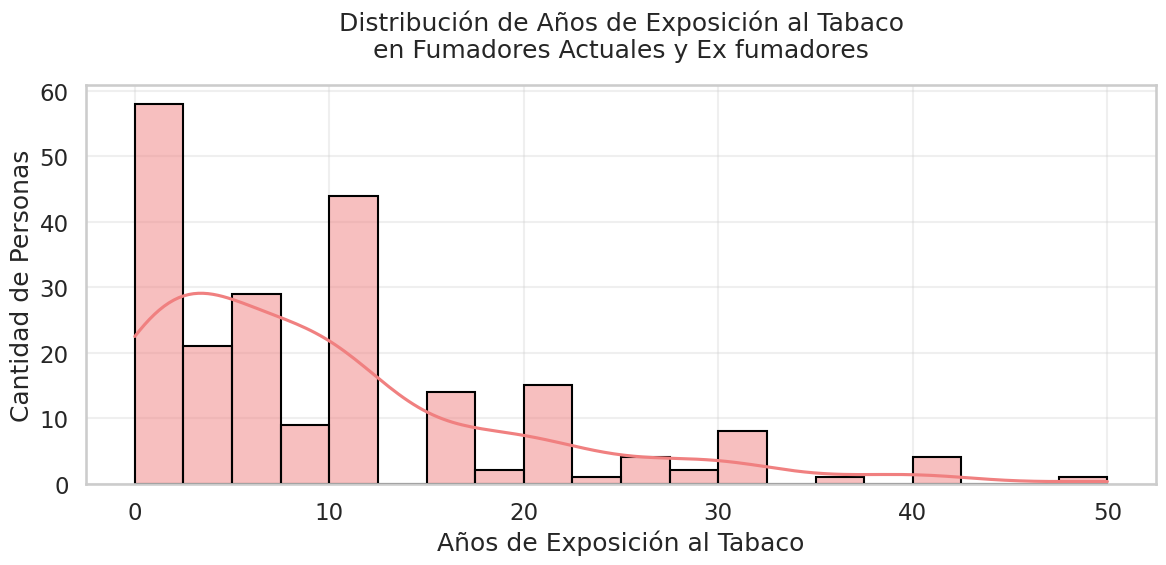


Estadísticas de Años de Exposición al Tabaco:
count    213.0
mean       9.6
std        9.5
min        0.0
25%        2.0
50%        7.0
75%       12.0
max       50.0
Name: years_smoked, dtype: float64


In [284]:
# Filtrar fumadores actuales y ex fumadores, excluyendo valores nulos
data_smokers = data[data['smoking_status'].isin(['CURRENT_SMOKER', 'FORMER_SMOKER'])]
data_smokers = data_smokers[data_smokers['years_smoked'].notna()]

# Convertir a numérico y filtrar valores realistas (0-80 años de exposición)
data_smokers['years_smoked'] = pd.to_numeric(data_smokers['years_smoked'], errors='coerce')
data_smokers = data_smokers[
    (data_smokers['years_smoked'] >= 0) & 
    (data_smokers['years_smoked'] <= 80)
]

# Crear el histograma con mejor estilo
plt.figure(figsize=(12, 6))
sns.histplot(
    data=data_smokers,
    x='years_smoked',
    bins=20,
    kde=True,
    color='lightcoral',
    edgecolor='black'
)

# Personalizar el gráfico
plt.title('Distribución de Años de Exposición al Tabaco\nen Fumadores Actuales y Ex fumadores', pad=20)
plt.xlabel('Años de Exposición al Tabaco')
plt.ylabel('Cantidad de Personas')

# Agregar grid para mejor lectura
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Mostrar estadísticas descriptivas
print("\nEstadísticas de Años de Exposición al Tabaco:")
print(data_smokers['years_smoked'].describe().round(1))

## f. Análisis de antropometría y actividad física

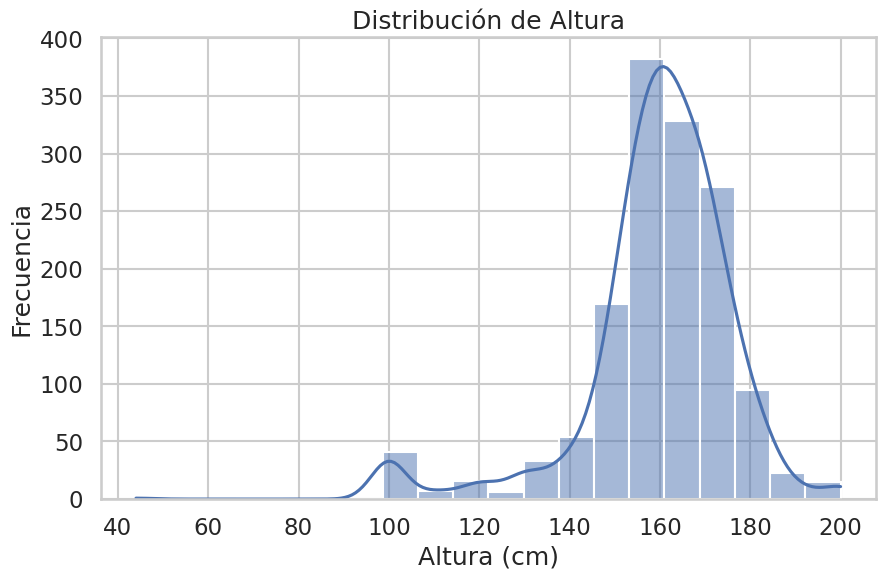

In [285]:
# Histograma de altura (cm)

# Convertir altura a cm
data['height_cm'] = data['height_meters'] * 100

# Crear histograma
plt.figure(figsize=(10, 6))
sns.histplot(data['height_cm'], bins=20, kde=True)
plt.title('Distribución de Altura')
plt.xlabel('Altura (cm)')
plt.ylabel('Frecuencia')
plt.show()

In [286]:
# Distribución de altura
data.height_cm.describe()

count    1441.000000
mean      159.712700
std        16.752509
min        44.000000
25%       154.000000
50%       161.000000
75%       170.000000
max       200.000000
Name: height_cm, dtype: float64

In [287]:
# Promedio de altura
height_mean_cm = data.height_cm.mean()

print(f"Promedio de altura: {data.height_cm.mean()}")

Promedio de altura: 159.71269951422624


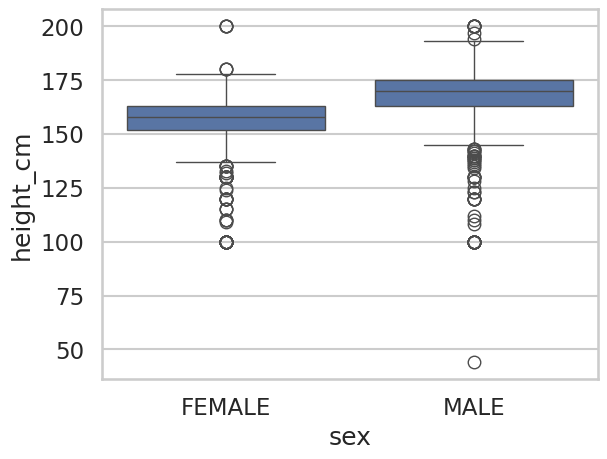

In [288]:
# Distribución de altura por sexo
sns.boxplot(x='sex', y='height_cm', data=data)
plt.show()


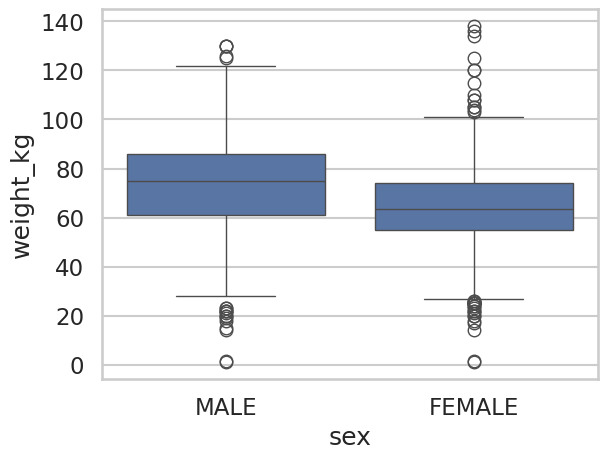

In [318]:
# Distribución de peso por sexo

# Filtrar valores de peso mayor a 150 kg
data_weight = data[data['weight_kg'] < 150]

sns.boxplot(x='sex', y='weight_kg', data=data_weight)
plt.show()


In [325]:
data_weight.weight_kg.describe()

count    1439.000000
mean       67.828388
std        19.853120
min         1.000000
25%        56.000000
50%        67.000000
75%        80.000000
max       138.000000
Name: weight_kg, dtype: float64

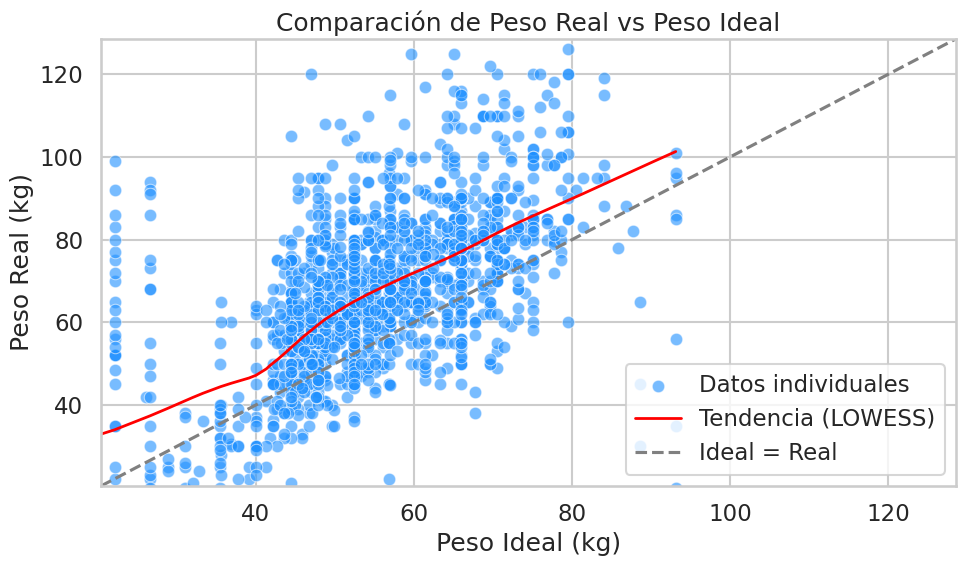

In [326]:
# Seleccionar registros con datos válidos para weight_kg e ideal_body_weight_value
plot_data = data[['weight_kg', 'ideal_body_weight_value']].dropna()

# Calcular límites usando percentiles (0.01 y 0.99) para descartar valores extremos
lower_limit = min(
    plot_data['weight_kg'].quantile(0.01), 
    plot_data['ideal_body_weight_value'].quantile(0.01)
)
upper_limit = max(
    plot_data['weight_kg'].quantile(0.99), 
    plot_data['ideal_body_weight_value'].quantile(0.99)
)

plt.figure(figsize=(10, 6))

# Gráfica de dispersión para los datos individuales
ax = sns.scatterplot(
    data=plot_data, 
    x='ideal_body_weight_value', 
    y='weight_kg', 
    color='dodgerblue', 
    alpha=0.6, 
    label='Datos individuales'
)

# Línea de tendencia usando LOWESS (sin mostrar puntos)
ax2 = sns.regplot(
    data=plot_data, 
    x='ideal_body_weight_value', 
    y='weight_kg', 
    scatter=False, 
    lowess=True, 
    color='red', 
    line_kws={'linewidth': 2}
)
# Asignar etiqueta a la línea de tendencia (LOWESS)
ax2.lines[0].set_label('Tendencia (LOWESS)')

# Línea de referencia: peso ideal igual a peso real
plt.plot(
    [lower_limit, upper_limit], 
    [lower_limit, upper_limit], 
    linestyle='--', 
    color='gray', 
    label='Ideal = Real'
)

plt.title("Comparación de Peso Real vs Peso Ideal")
plt.xlabel("Peso Ideal (kg)")
plt.ylabel("Peso Real (kg)")
plt.xlim(lower_limit, upper_limit)
plt.ylim(lower_limit, upper_limit)
plt.legend()
plt.tight_layout()
plt.show()

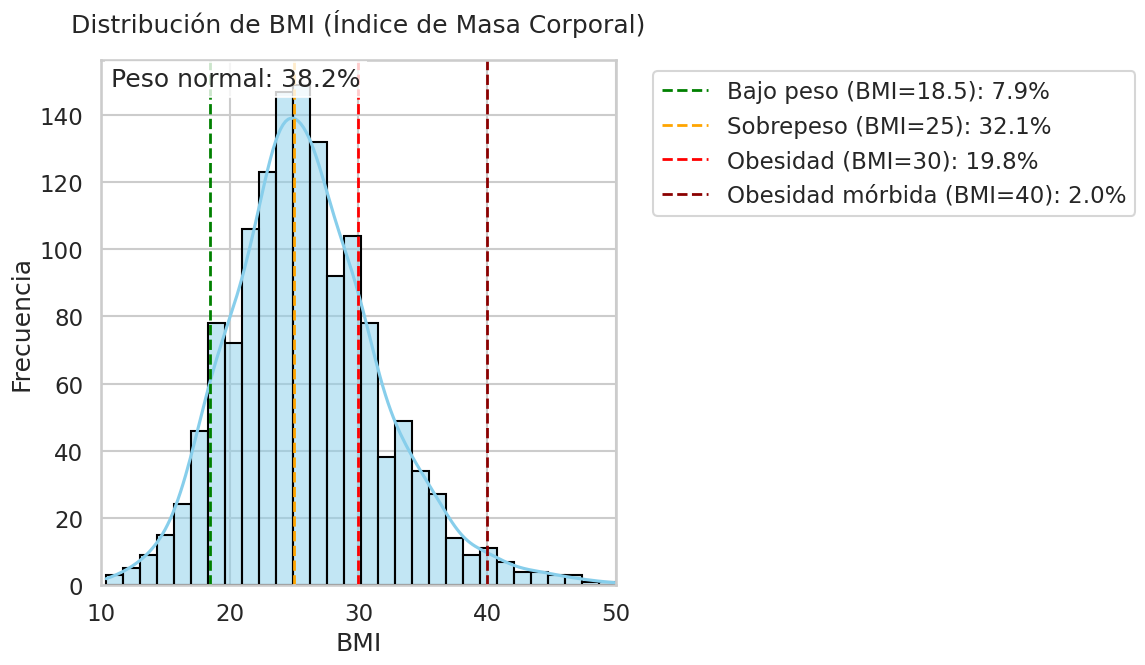


Estadísticas de BMI por categoría:
Bajo peso (<18.5): 110 personas (7.9%)
Peso normal (18.5-24.9): 530 personas (38.2%)
Sobrepeso (25-29.9): 445 personas (32.1%)
Obesidad (30-39.9): 275 personas (19.8%)
Obesidad mórbida (≥40): 28 personas (2.0%)


In [333]:
# Filtrar datos para BMI entre 10 y 50
data_filtered = data_weight[
    (data_weight['bmi_value'] >= 10) & 
    (data_weight['bmi_value'] <= 50)
].copy()

# Calcular porcentajes por categoría
total_people = len(data_filtered)
bajo_peso = (data_filtered['bmi_value'] < 18.5).sum()
normal = ((data_filtered['bmi_value'] >= 18.5) & (data_filtered['bmi_value'] < 25)).sum()
sobrepeso = ((data_filtered['bmi_value'] >= 25) & (data_filtered['bmi_value'] < 30)).sum()
obesidad = ((data_filtered['bmi_value'] >= 30) & (data_filtered['bmi_value'] < 40)).sum()
obesidad_morbida = (data_filtered['bmi_value'] >= 40).sum()

# Graficar la distribución
plt.figure(figsize=(12, 7))
sns.histplot(data=data_filtered['bmi_value'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribución de BMI (Índice de Masa Corporal)', pad=20)
plt.xlabel('BMI')
plt.ylabel('Frecuencia')

# Líneas de referencia con porcentajes
plt.axvline(x=18.5, color='green', linestyle='--', linewidth=2, 
            label=f'Bajo peso (BMI=18.5): {bajo_peso/total_people*100:.1f}%')
plt.axvline(x=25, color='orange', linestyle='--', linewidth=2, 
            label=f'Sobrepeso (BMI=25): {sobrepeso/total_people*100:.1f}%')
plt.axvline(x=30, color='red', linestyle='--', linewidth=2, 
            label=f'Obesidad (BMI=30): {obesidad/total_people*100:.1f}%')
plt.axvline(x=40, color='darkred', linestyle='--', linewidth=2, 
            label=f'Obesidad mórbida (BMI=40): {obesidad_morbida/total_people*100:.1f}%')

# Ajustar límites del eje x
plt.xlim(10, 50)

# Añadir texto con el porcentaje de peso normal
plt.text(0.02, 0.95, f'Peso normal: {normal/total_people*100:.1f}%', 
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Imprimir estadísticas
print("\nEstadísticas de BMI por categoría:")
print(f"Bajo peso (<18.5): {bajo_peso} personas ({bajo_peso/total_people*100:.1f}%)")
print(f"Peso normal (18.5-24.9): {normal} personas ({normal/total_people*100:.1f}%)")
print(f"Sobrepeso (25-29.9): {sobrepeso} personas ({sobrepeso/total_people*100:.1f}%)")
print(f"Obesidad (30-39.9): {obesidad} personas ({obesidad/total_people*100:.1f}%)")
print(f"Obesidad mórbida (≥40): {obesidad_morbida} personas ({obesidad_morbida/total_people*100:.1f}%)")

In [329]:
data_weight.bmi_value.describe()

count    1428.000000
mean       26.817962
std         9.466266
min         0.330000
25%        22.137500
50%        25.660000
75%        29.540000
max       144.630000
Name: bmi_value, dtype: float64

/tmp/ipykernel_42233/2750313499.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


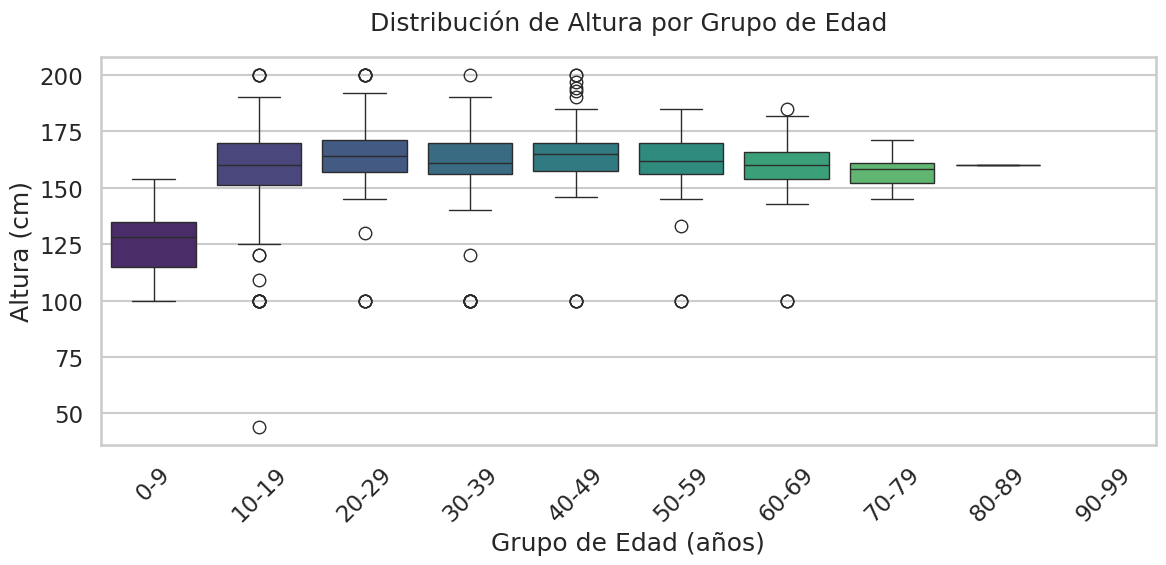


Estadísticas de altura por grupo de edad:
           count   mean   std    min    25%    50%    75%    max
age_group                                                       
0-9         65.0  125.0  14.9  100.0  115.0  128.0  135.0  154.0
10-19      346.0  158.1  17.4   44.0  151.2  160.0  170.0  200.0
20-29      257.0  164.4  13.5  100.0  157.0  164.0  171.0  200.0
30-39      309.0  161.2  14.3  100.0  156.0  161.0  170.0  200.0
40-49      270.0  164.0  12.6  100.0  157.2  165.0  170.0  200.0
50-59      103.0  161.6  14.6  100.0  156.0  162.0  170.0  185.0
60-69       76.0  158.2  14.8  100.0  154.0  160.0  166.0  185.0
70-79       12.0  157.3   7.7  145.0  152.2  158.5  161.0  171.0
80-89        2.0  160.0   0.0  160.0  160.0  160.0  160.0  160.0
90-99        0.0    NaN   NaN    NaN    NaN    NaN    NaN    NaN


/tmp/ipykernel_42233/2750313499.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby('age_group')['height_cm'].describe().round(1))


In [289]:
# Crear figura con un tamaño más adecuado
plt.figure(figsize=(12, 6))

# Usar los grupos de edad que ya habíamos creado anteriormente
sns.boxplot(
    x='age_group', 
    y='height_cm', 
    data=data,
    palette='viridis'
)

# Personalizar el gráfico
plt.title('Distribución de Altura por Grupo de Edad', pad=20)
plt.xlabel('Grupo de Edad (años)')
plt.ylabel('Altura (cm)')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Ajustar los márgenes
plt.tight_layout()

plt.show()

# Mostrar estadísticas resumidas
print("\nEstadísticas de altura por grupo de edad:")
print(data.groupby('age_group')['height_cm'].describe().round(1))

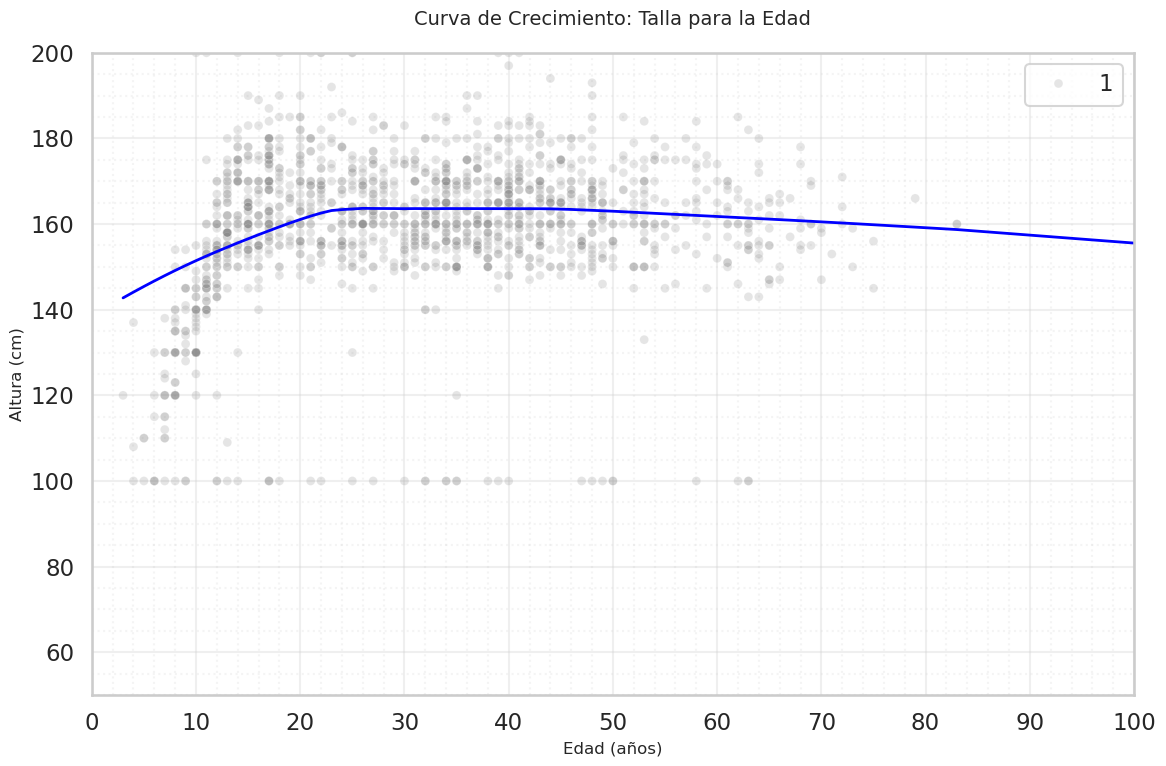

In [290]:
# Crear figura con un tamaño adecuado
plt.figure(figsize=(12, 8))

# Configurar estilo de la cuadrícula
plt.grid(True, which='major', linestyle='-', alpha=0.3)
plt.grid(True, which='minor', linestyle=':', alpha=0.2)

# Crear scatter plot con transparencia
sns.scatterplot(
    data=data,
    x='age_years',
    y='height_cm',
    alpha=0.2,
    color='gray',
    size=1
)

# Agregar línea de tendencia suavizada con bandas de confianza
sns.regplot(
    data=data,
    x='age_years',
    y='height_cm',
    scatter=False,
    lowess=True,
    color='blue',
    line_kws={'linewidth': 2},
)

# Personalizar el gráfico
plt.title('Curva de Crecimiento: Talla para la Edad', pad=20, fontsize=14)
plt.xlabel('Edad (años)', fontsize=12)
plt.ylabel('Altura (cm)', fontsize=12)

# Establecer límites y ticks
plt.xlim(0, 100)
plt.ylim(50, 200)

# Configurar ticks principales y secundarios
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(10))  # Ticks principales cada 10 años
ax.xaxis.set_minor_locator(plt.MultipleLocator(2))   # Ticks secundarios cada 2 años
ax.yaxis.set_major_locator(plt.MultipleLocator(20))  # Ticks principales cada 20 cm
ax.yaxis.set_minor_locator(plt.MultipleLocator(5))   # Ticks secundarios cada 5 cm

# Ajustar los márgenes
plt.tight_layout()

plt.show()

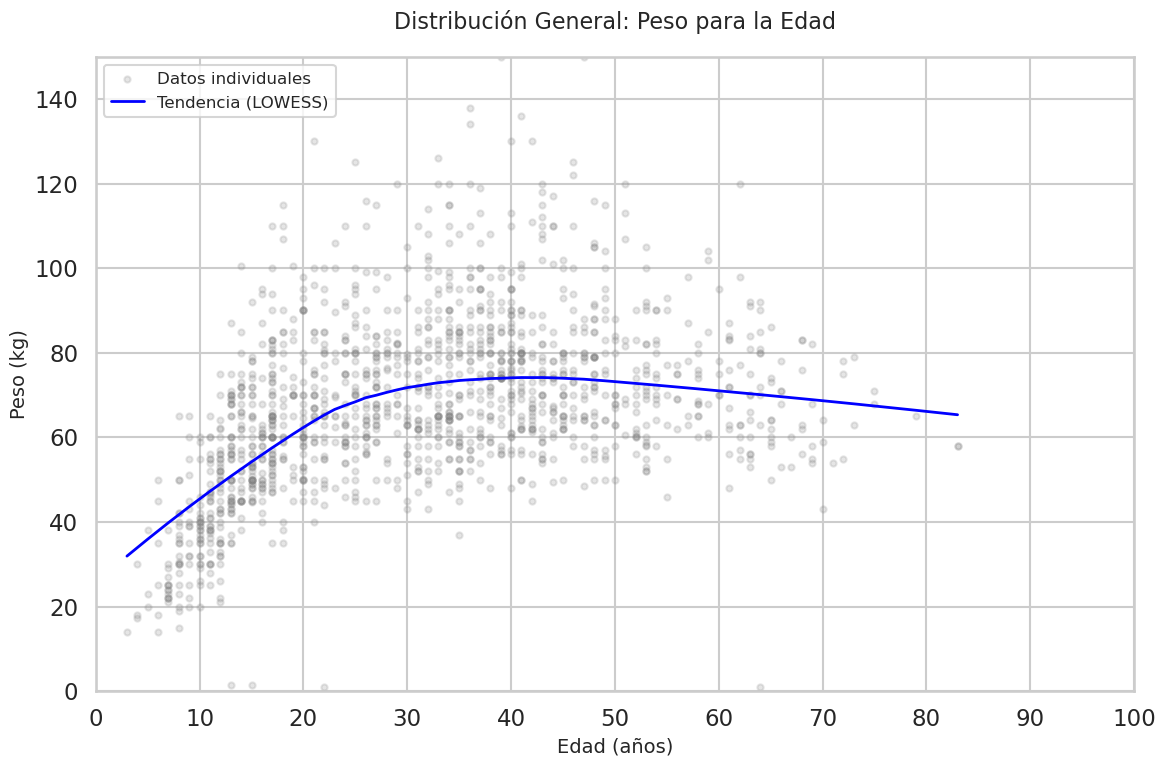

In [291]:
# Configurar el estilo para obtener una apariencia limpia similar a la de las curvas de crecimiento de la OMS
sns.set_theme(style="whitegrid", context="talk")

# Filtrar los datos en el rango de edad de interés (0 a 100 años)
filtered_data = data[(data['age_years'] >= 0) & (data['age_years'] <= 100)].copy()

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar los datos individuales con transparencia
ax.scatter(
    filtered_data['age_years'],
    filtered_data['weight_kg'],
    color='gray',
    alpha=0.2,
    s=20,
    label='Datos individuales'
)

# Agregar la línea de tendencia suavizada mediante LOWESS
sns.regplot(
    data=filtered_data,
    x='age_years',
    y='weight_kg',
    scatter=False,
    lowess=True,
    color='blue',
    line_kws={'linewidth': 2},
    ax=ax,
    label='Tendencia (LOWESS)'
)

# Personalizar el gráfico: títulos, etiquetas y límites
ax.set_title('Distribución General: Peso para la Edad', fontsize=16, pad=20)
ax.set_xlabel('Edad (años)', fontsize=14)
ax.set_ylabel('Peso (kg)', fontsize=14)
ax.set_xlim(0, 100)
ax.set_ylim(0, 150)

# Configurar los locators para los ticks
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
ax.yaxis.set_major_locator(plt.MultipleLocator(20))
ax.yaxis.set_minor_locator(plt.MultipleLocator(5))

ax.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

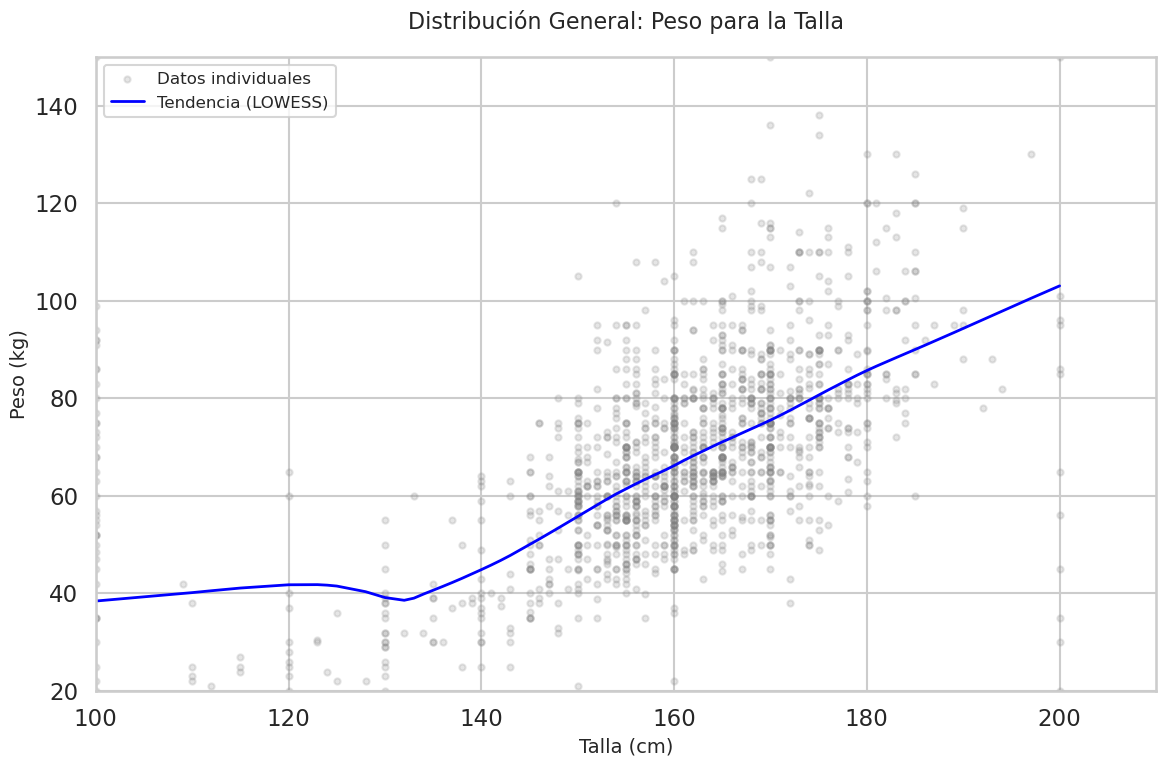

In [292]:
# Configurar el estilo para obtener una apariencia limpia similar a la de las curvas de crecimiento de la OMS
sns.set_theme(style="whitegrid", context="talk")

# Filtrar los datos para tomar solamente aquellos registros con valores de talla y peso realistas
filtered_data = data[
    (data['height_cm'] >= 100) & (data['height_cm'] <= 210) &
    (data['weight_kg'] >= 20) & (data['weight_kg'] <= 150)
].copy()

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar los datos individuales con transparencia
ax.scatter(
    filtered_data['height_cm'],
    filtered_data['weight_kg'],
    color='gray',
    alpha=0.2,
    s=20,
    label='Datos individuales'
)

# Agregar la línea de tendencia suavizada mediante LOWESS
sns.regplot(
    data=filtered_data,
    x='height_cm',
    y='weight_kg',
    scatter=False,
    lowess=True,
    color='blue',
    line_kws={'linewidth': 2},
    ax=ax,
    label='Tendencia (LOWESS)'
)

# Personalizar el gráfico: título, etiquetas y límites
ax.set_title('Distribución General: Peso para la Talla', fontsize=16, pad=20)
ax.set_xlabel('Talla (cm)', fontsize=14)
ax.set_ylabel('Peso (kg)', fontsize=14)
ax.set_xlim(100, 210)
ax.set_ylim(20, 150)

# Configurar ticks principales y secundarios
ax.xaxis.set_major_locator(plt.MultipleLocator(20))
ax.xaxis.set_minor_locator(plt.MultipleLocator(10))
ax.yaxis.set_major_locator(plt.MultipleLocator(20))
ax.yaxis.set_minor_locator(plt.MultipleLocator(5))

ax.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

## g. Distribución de caídas y otros datos de riesgo

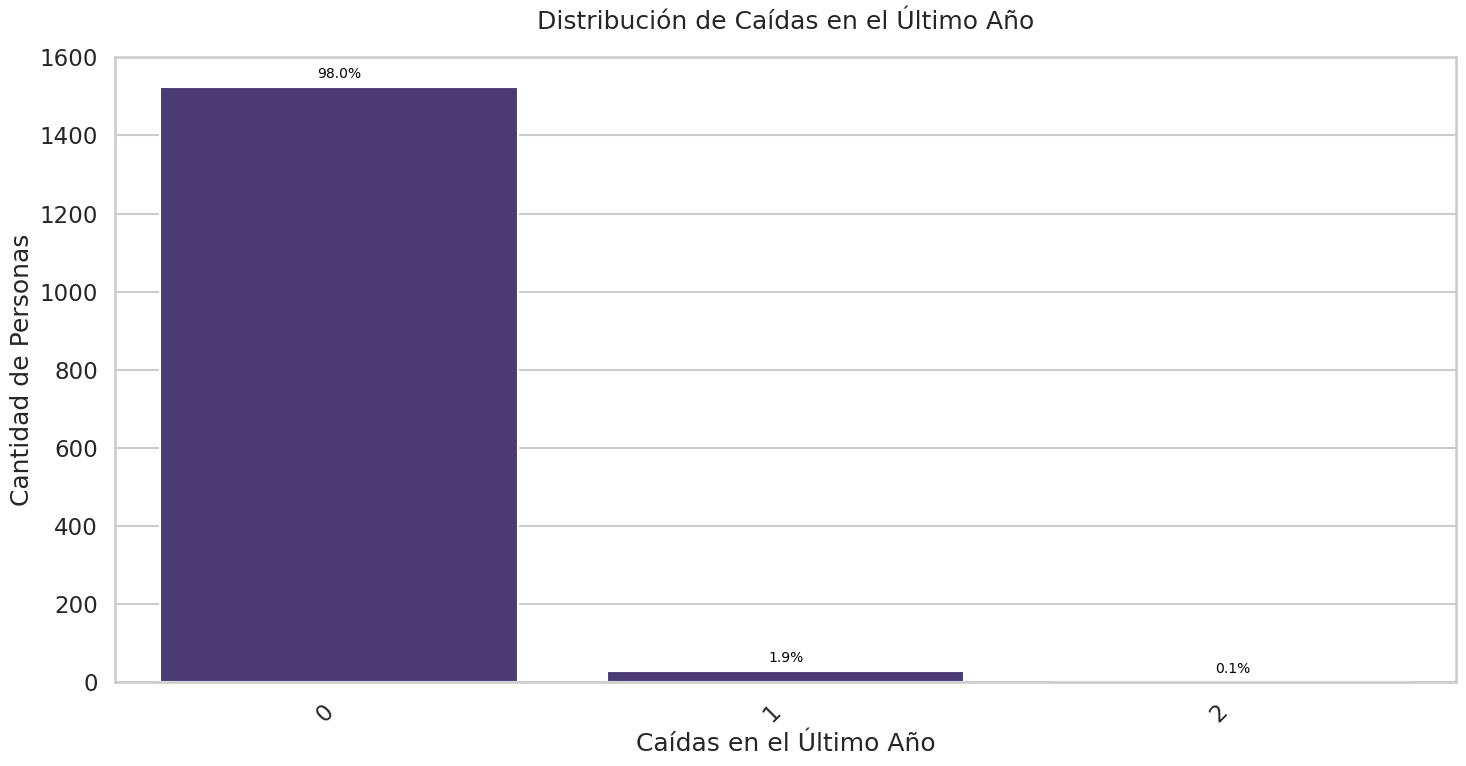

In [293]:
# Caídas
plot_category_counts(
    data, 
    column='falls_last_year', 
    title="Distribución de Caídas en el Último Año", 
    xlabel="Caídas en el Último Año", 
    ylabel="Cantidad de Personas", 
    figsize=(15,8), 
    rotation=45, 
    ha='right', 
    use_hue=False
)

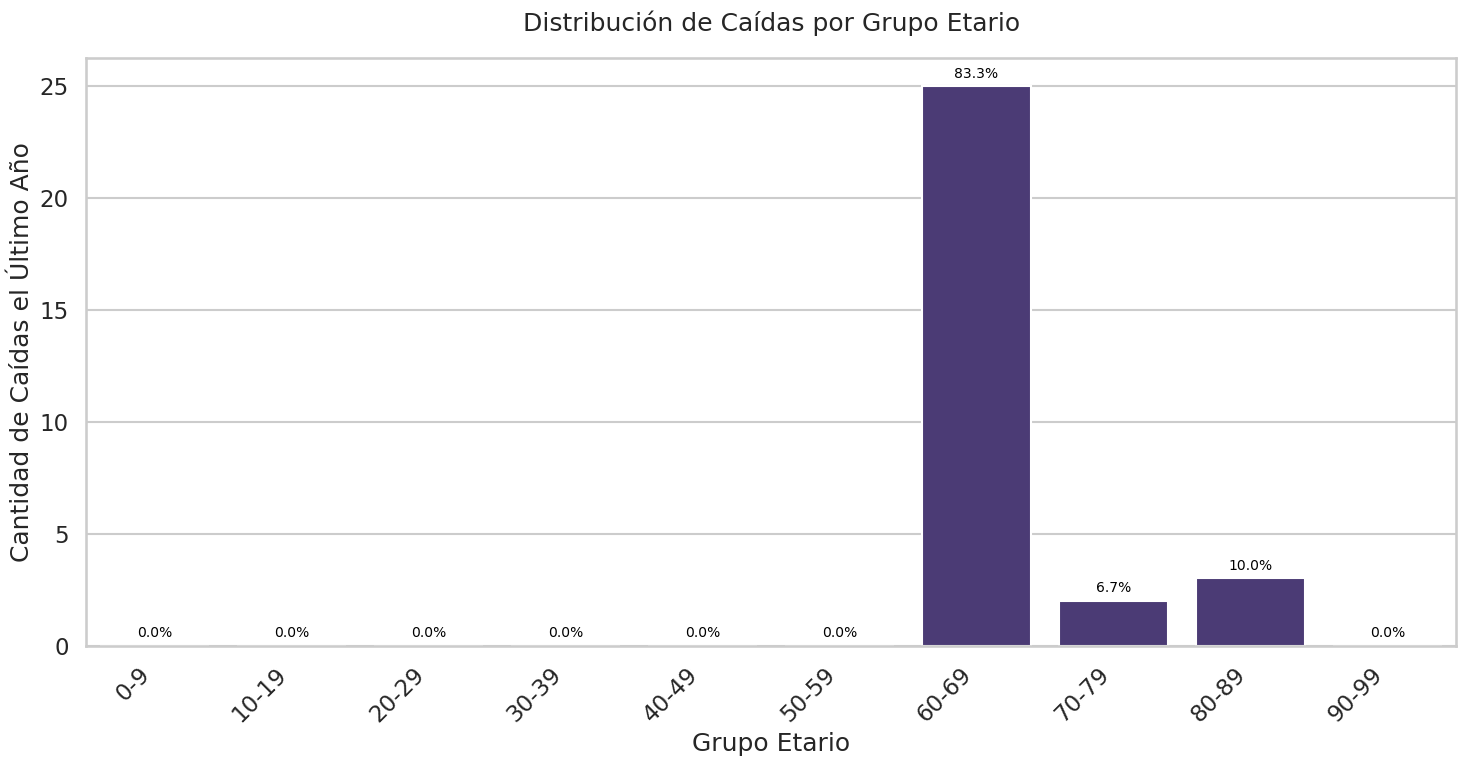

In [294]:
# Distribución de caídas por grupo etario
# Filtrar registros con caídas (al menos una caída en el último año)
data_fallers = data[data['falls_last_year'] > 0].copy()

# Distribución de caídas por grupo etario
plot_category_counts(
    data_fallers, 
    column='age_group', 
    title="Distribución de Caídas por Grupo Etario", 
    xlabel="Grupo Etario", 
    ylabel="Cantidad de Caídas el Último Año",
    figsize=(15,8), 
    rotation=45, 
    ha='right', 
    use_hue=False
)


## Presión Arterial

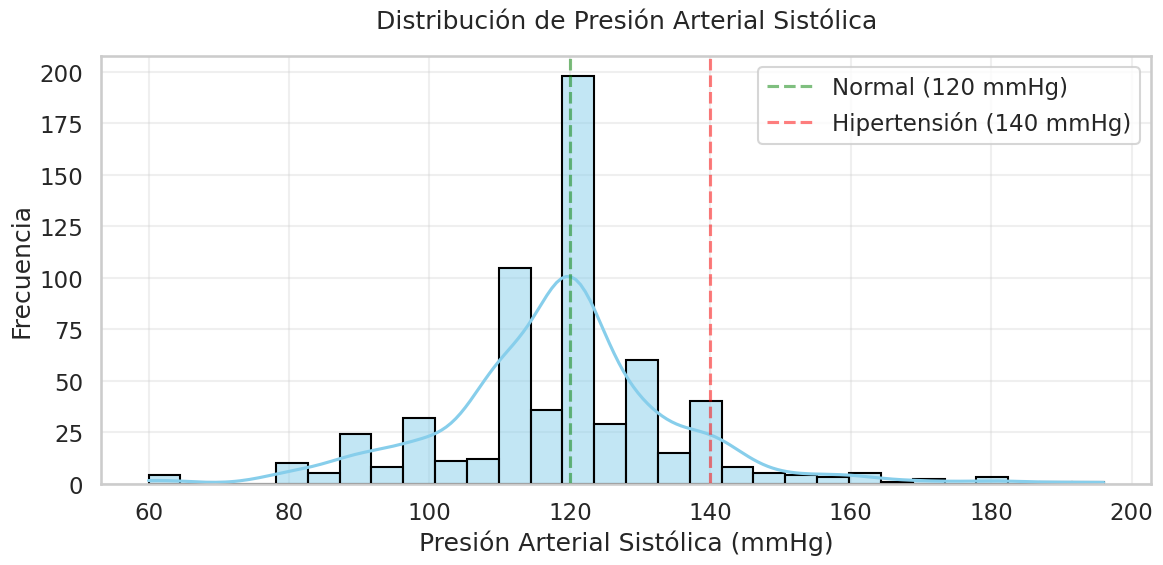


Estadísticas de Presión Arterial Sistólica:
count    622.0
mean     119.0
std       17.0
min       60.0
25%      110.0
50%      120.0
75%      126.0
max      196.0
Name: systolic_blood_pressure_mm_hg, dtype: float64


In [295]:
# Filtrar registros donde la presión arterial sistólica no sea nula ni la cadena "NULL"
data_systolic = data[
    (data['systolic_blood_pressure_mm_hg'].notna()) &
    (data['systolic_blood_pressure_mm_hg'] != "NULL")
].copy()

# Convertir a numérico y filtrar valores razonables de presión sistólica (60-200 mmHg)
data_systolic['systolic_blood_pressure_mm_hg'] = pd.to_numeric(
    data_systolic['systolic_blood_pressure_mm_hg'], 
    errors='coerce'
)
data_systolic = data_systolic[
    (data_systolic['systolic_blood_pressure_mm_hg'] >= 60) &
    (data_systolic['systolic_blood_pressure_mm_hg'] <= 300)
]

# Crear el histograma con más bins y mejor estilo
plt.figure(figsize=(12, 6))
sns.histplot(
    data=data_systolic,
    x='systolic_blood_pressure_mm_hg',
    bins=30,
    kde=True,
    color='skyblue',
    edgecolor='black'
)

# Personalizar el gráfico
plt.title('Distribución de Presión Arterial Sistólica', pad=20)
plt.xlabel('Presión Arterial Sistólica (mmHg)')
plt.ylabel('Frecuencia')

# Agregar líneas de referencia para valores normales (120/80)
plt.axvline(x=120, color='green', linestyle='--', alpha=0.5, label='Normal (120 mmHg)')
plt.axvline(x=140, color='red', linestyle='--', alpha=0.5, label='Hipertensión (140 mmHg)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Mostrar estadísticas descriptivas
print("\nEstadísticas de Presión Arterial Sistólica:")
print(data_systolic['systolic_blood_pressure_mm_hg'].describe().round(0))

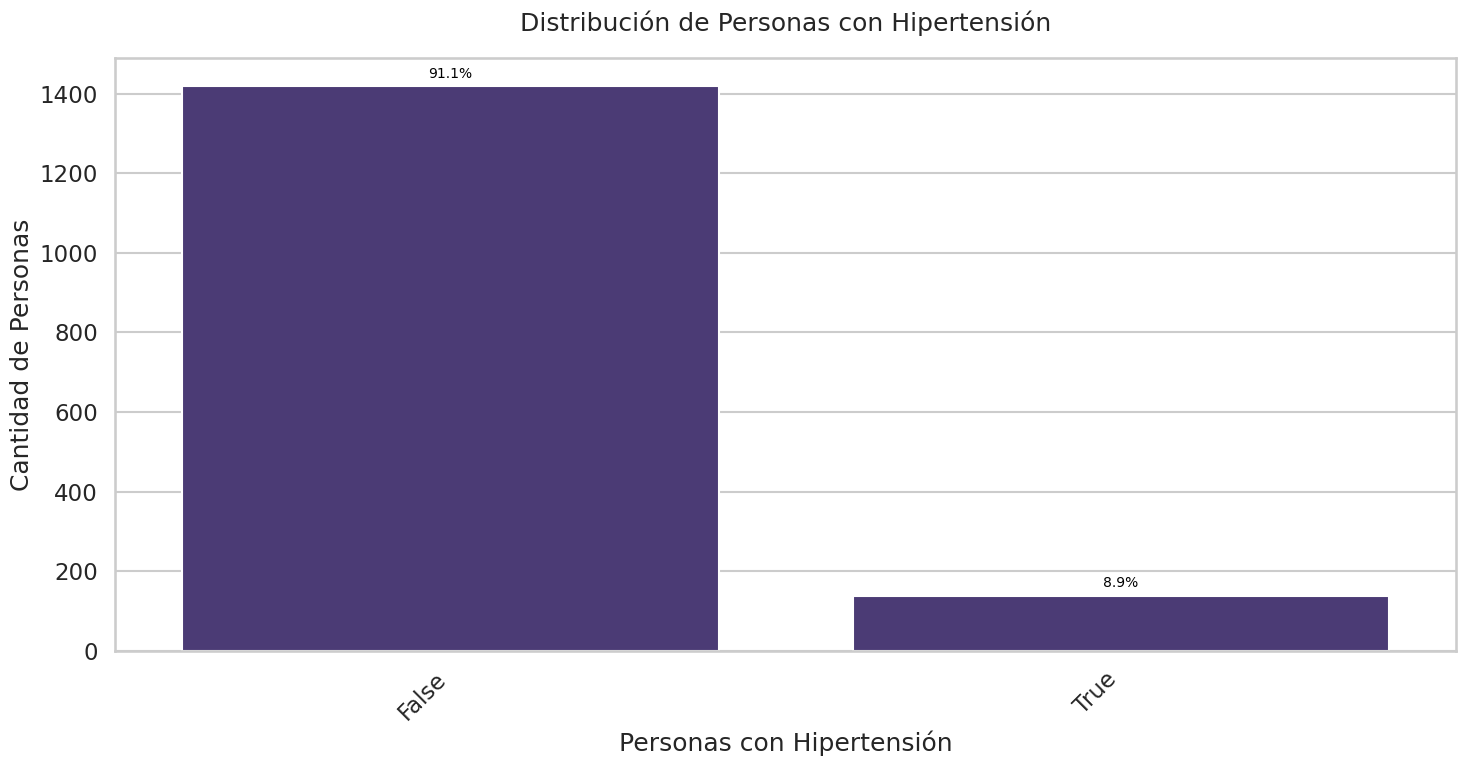

In [296]:
# Distribución de personas con Hipertensión
plot_category_counts(
    data, 
    column='has_hypertension', 
    title="Distribución de Personas con Hipertensión", 
    xlabel="Personas con Hipertensión", 
    ylabel="Cantidad de Personas", 
    figsize=(15,8), 
    rotation=45, 
    ha='right', 
    use_hue=False
)

In [297]:
data.has_hypertension.value_counts()

has_hypertension
False    1418
True      138
Name: count, dtype: int64

Porcentaje diagnosticado: 8.868894601542417%
Prevalencia estimada: 35%
Porcentaje subdiagnosticado (dentro de la prevalencia): 0.7%


/tmp/ipykernel_42233/2412830000.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=categories, y=values, palette="viridis")


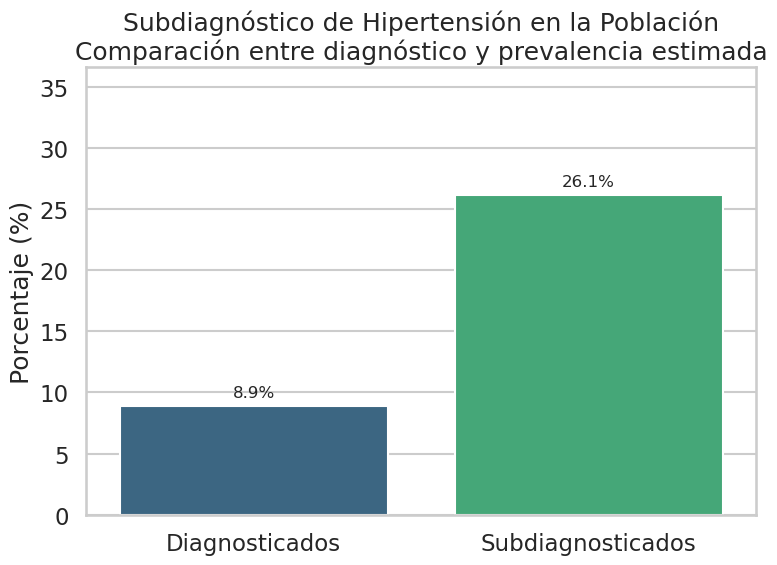

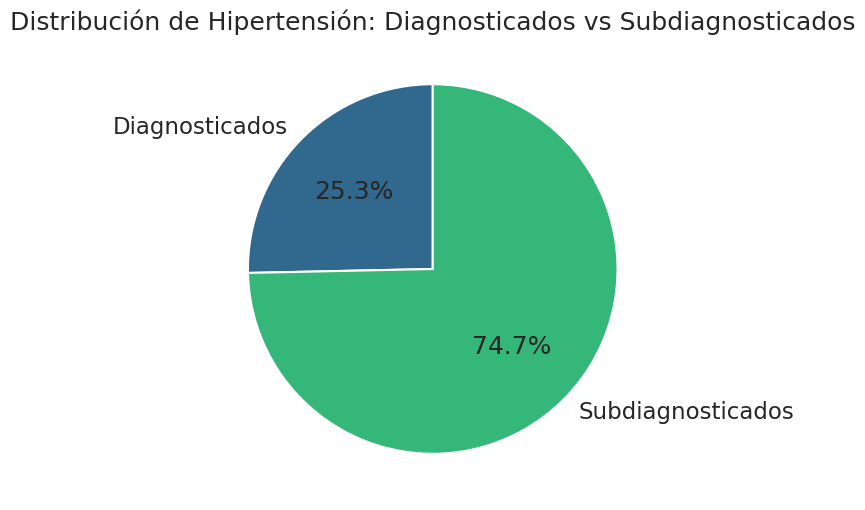

In [307]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración inicial del estilo
sns.set_theme(style="whitegrid", context="talk")

# Valores obtenidos (en %)
diagnosed_percentage = data['has_hypertension'].value_counts(normalize=True).get(True, 0) * 100
estimated_prevalence = 35      # Prevalencia estimada de diabetes en la población
undiagnosed_percentage = estimated_prevalence - diagnosed_percentage

# Cálculo de la proporción de subdiagnosticados dentro de la prevalencia estimada
subdiagnosed_fraction = (undiagnosed_percentage / estimated_prevalence)

# Mostrar la información en consola
print(f"Porcentaje diagnosticado: {diagnosed_percentage}%")
print(f"Prevalencia estimada: {estimated_prevalence}%")
print(f"Porcentaje subdiagnosticado (dentro de la prevalencia): {subdiagnosed_fraction:.1f}%")

# Representación gráfica: Gráfico de barras
categories = ['Diagnosticados', 'Subdiagnosticados']
values = [diagnosed_percentage, undiagnosed_percentage]

plt.figure(figsize=(8,6))
ax = sns.barplot(x=categories, y=values, palette="viridis")

# Anotamos cada barra con su porcentaje
for index, value in enumerate(values):
    ax.text(index, value + 0.5, f"{value:.1f}%", ha="center", va="bottom", fontsize=12)

plt.title("Subdiagnóstico de Hipertensión en la Población\nComparación entre diagnóstico y prevalencia estimada")
plt.ylabel("Porcentaje (%)")
plt.ylim(0, max(values) * 1.4)
plt.tight_layout()
plt.show()

# Representación gráfica alternativa: Gráfico de pastel
labels = ['Diagnosticados', 'Subdiagnosticados']
sizes = [diagnosed_percentage, undiagnosed_percentage]
colors = sns.color_palette("viridis", 2)

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Distribución de Hipertensión: Diagnosticados vs Subdiagnosticados")
plt.show()

Total de personas encuestadas: 1556
Personas diagnosticadas de hipertension: 138 (8.9%)
Prevalencia estimada de hipertension: 35% --> Aproximadamente 545 personas
Posibles casos subdiagnosticados: 407 (26.1%)


/tmp/ipykernel_42233/928796975.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette="viridis", ax=axes[0])


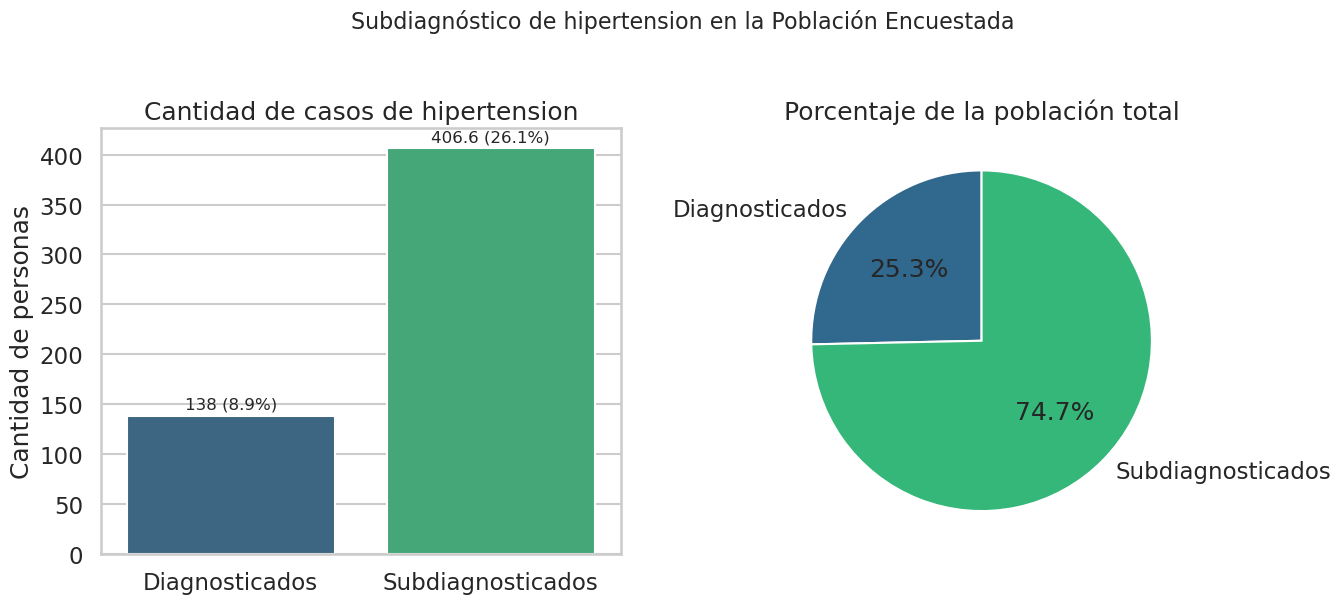

In [309]:
# Calcular la cantidad total de personas encuestadas
total_population = len(data)

# Cantidad de personas que se conocen con hipertension
diagnosed_count = data[data['has_hypertension'] == True].shape[0]
diagnosed_pct = (diagnosed_count / total_population) * 100

# Prevalencia estimada de hipertension (10.5%)
estimated_prevalence = 35
estimated_count = total_population * estimated_prevalence / 100

# Calcular posibles casos subdiagnosticados
undiagnosed_count = estimated_count - diagnosed_count
undiagnosed_pct = (undiagnosed_count / total_population) * 100

# Mostrar en consola los cálculos
print(f"Total de personas encuestadas: {total_population}")
print(f"Personas diagnosticadas de hipertension: {diagnosed_count} ({diagnosed_pct:.1f}%)")
print(f"Prevalencia estimada de hipertension: {estimated_prevalence}% --> Aproximadamente {estimated_count:.0f} personas")
print(f"Posibles casos subdiagnosticados: {undiagnosed_count:.0f} ({undiagnosed_pct:.1f}%)")

# Crear las visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. Gráfico de barras para visualizar la cantidad y el porcentaje
categories = ['Diagnosticados', 'Subdiagnosticados']
counts = [diagnosed_count, undiagnosed_count]
percentages = [diagnosed_pct, undiagnosed_pct]

sns.barplot(x=categories, y=counts, palette="viridis", ax=axes[0])
axes[0].set_title("Cantidad de casos de hipertension")
axes[0].set_ylabel("Cantidad de personas")
for i, v in enumerate(counts):
    axes[0].text(i, v + max(counts)*0.01, f"{v} ({percentages[i]:.1f}%)", 
                 ha="center", va="bottom", fontsize=12)

# 2. Gráfico de pastel para representar el porcentaje de la población total
labels = ['Diagnosticados', 'Subdiagnosticados']
sizes = [diagnosed_pct, undiagnosed_pct]
colors = sns.color_palette("viridis", n_colors=2)
axes[1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title("Porcentaje de la población total")

plt.suptitle("Subdiagnóstico de hipertension en la Población Encuestada", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

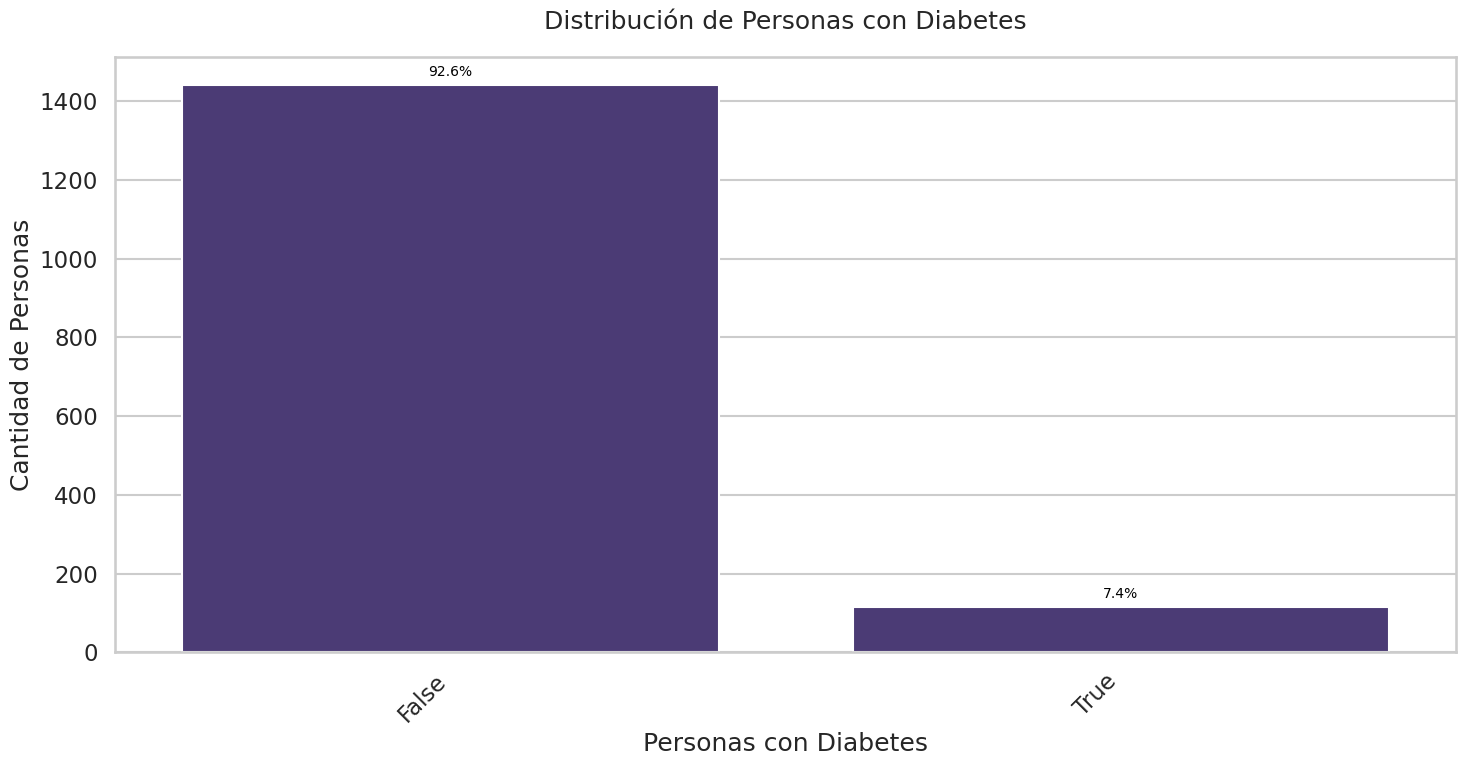

In [299]:
# Distribución de personas con Diabetes
plot_category_counts(
    data, 
    column='has_diabetes', 
    title="Distribución de Personas con Diabetes", 
    xlabel="Personas con Diabetes", 
    ylabel="Cantidad de Personas", 
    figsize=(15,8), 
    rotation=45, 
    ha='right', 
    use_hue=False
)

Porcentaje diagnosticado: 7.3907455012853465%
Prevalencia estimada: 10.5%
Porcentaje subdiagnosticado (dentro de la prevalencia): 29.6%


/tmp/ipykernel_42233/3933524624.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=categories, y=values, palette="viridis")


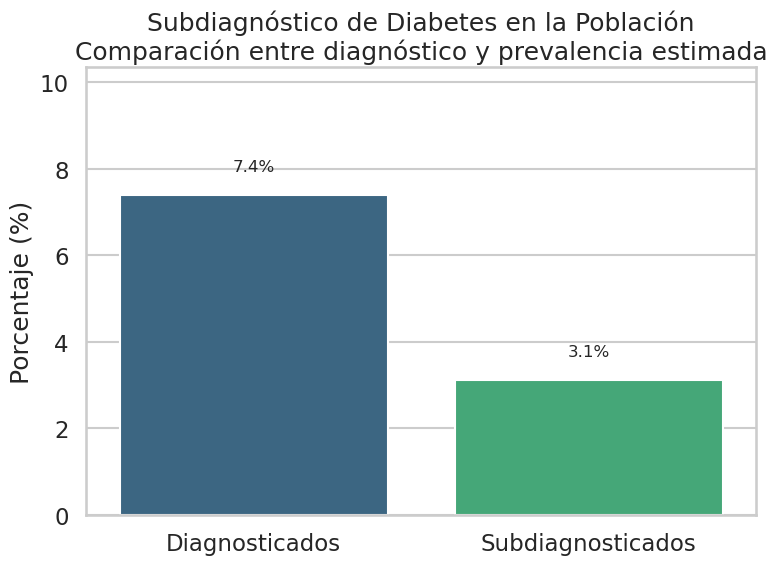

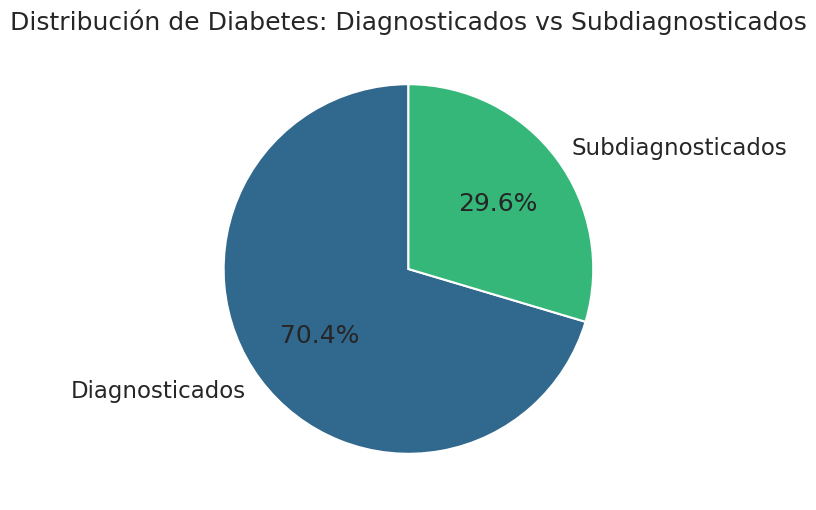

In [300]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración inicial del estilo
sns.set_theme(style="whitegrid", context="talk")

# Valores obtenidos (en %)
diagnosed_percentage = data.has_diabetes.value_counts(normalize=True).get(True, 0) * 100
estimated_prevalence = 10.5      # Prevalencia estimada de diabetes en la población
undiagnosed_percentage = estimated_prevalence - diagnosed_percentage

# Cálculo de la proporción de subdiagnosticados dentro de la prevalencia estimada
subdiagnosed_fraction = (undiagnosed_percentage / estimated_prevalence) * 100

# Mostrar la información en consola
print(f"Porcentaje diagnosticado: {diagnosed_percentage}%")
print(f"Prevalencia estimada: {estimated_prevalence}%")
print(f"Porcentaje subdiagnosticado (dentro de la prevalencia): {subdiagnosed_fraction:.1f}%")

# Representación gráfica: Gráfico de barras
categories = ['Diagnosticados', 'Subdiagnosticados']
values = [diagnosed_percentage, undiagnosed_percentage]

plt.figure(figsize=(8,6))
ax = sns.barplot(x=categories, y=values, palette="viridis")

# Anotamos cada barra con su porcentaje
for index, value in enumerate(values):
    ax.text(index, value + 0.5, f"{value:.1f}%", ha="center", va="bottom", fontsize=12)

plt.title("Subdiagnóstico de Diabetes en la Población\nComparación entre diagnóstico y prevalencia estimada")
plt.ylabel("Porcentaje (%)")
plt.ylim(0, max(values) * 1.4)
plt.tight_layout()
plt.show()

# Representación gráfica alternativa: Gráfico de pastel
labels = ['Diagnosticados', 'Subdiagnosticados']
sizes = [diagnosed_percentage, undiagnosed_percentage]
colors = sns.color_palette("viridis", 2)

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Distribución de Diabetes: Diagnosticados vs Subdiagnosticados")
plt.show()

Total de personas encuestadas: 1556
Personas diagnosticadas de diabetes: 115 (7.4%)
Prevalencia estimada de diabetes: 10.5% --> Aproximadamente 163 personas
Posibles casos subdiagnosticados: 48 (3.1%)


/tmp/ipykernel_42233/508512400.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette="viridis", ax=axes[0])


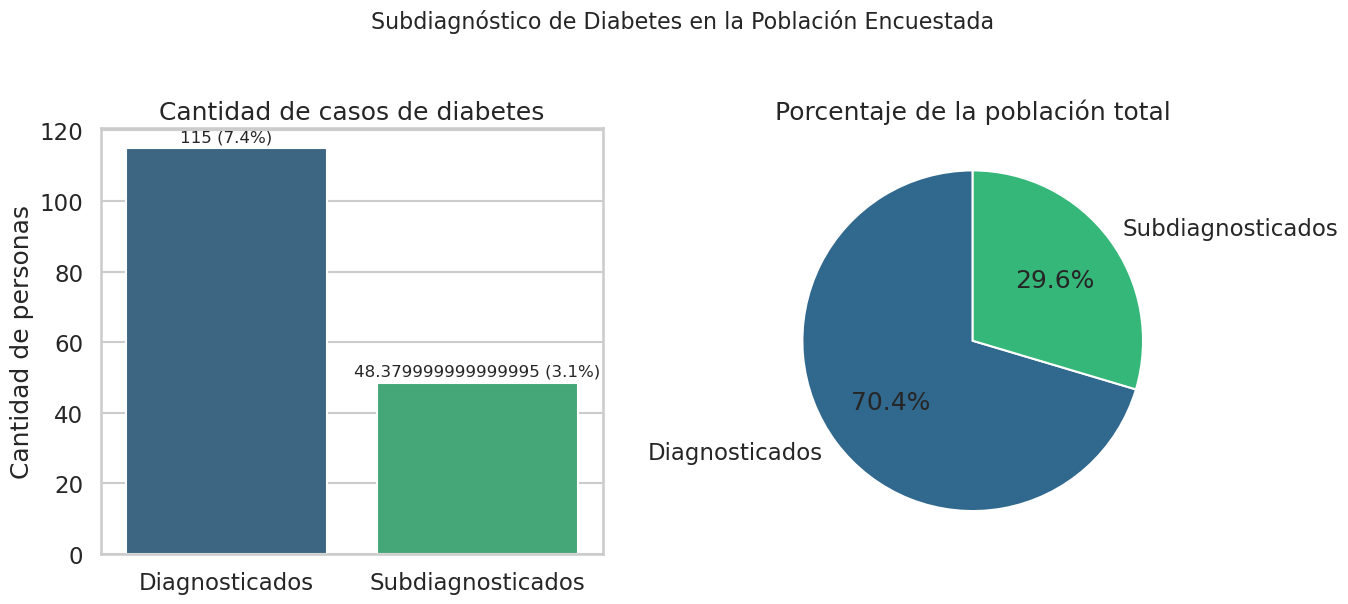

In [301]:
# Calcular la cantidad total de personas encuestadas
total_population = len(data)

# Cantidad de personas que se conocen con diabetes
diagnosed_count = data[data['has_diabetes'] == True].shape[0]
diagnosed_pct = (diagnosed_count / total_population) * 100

# Prevalencia estimada de diabetes (10.5%)
estimated_prevalence = 10.5
estimated_count = total_population * estimated_prevalence / 100

# Calcular posibles casos subdiagnosticados
undiagnosed_count = estimated_count - diagnosed_count
undiagnosed_pct = (undiagnosed_count / total_population) * 100

# Mostrar en consola los cálculos
print(f"Total de personas encuestadas: {total_population}")
print(f"Personas diagnosticadas de diabetes: {diagnosed_count} ({diagnosed_pct:.1f}%)")
print(f"Prevalencia estimada de diabetes: {estimated_prevalence}% --> Aproximadamente {estimated_count:.0f} personas")
print(f"Posibles casos subdiagnosticados: {undiagnosed_count:.0f} ({undiagnosed_pct:.1f}%)")

# Crear las visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. Gráfico de barras para visualizar la cantidad y el porcentaje
categories = ['Diagnosticados', 'Subdiagnosticados']
counts = [diagnosed_count, undiagnosed_count]
percentages = [diagnosed_pct, undiagnosed_pct]

sns.barplot(x=categories, y=counts, palette="viridis", ax=axes[0])
axes[0].set_title("Cantidad de casos de diabetes")
axes[0].set_ylabel("Cantidad de personas")
for i, v in enumerate(counts):
    axes[0].text(i, v + max(counts)*0.01, f"{v} ({percentages[i]:.1f}%)", 
                 ha="center", va="bottom", fontsize=12)

# 2. Gráfico de pastel para representar el porcentaje de la población total
labels = ['Diagnosticados', 'Subdiagnosticados']
sizes = [diagnosed_pct, undiagnosed_pct]
colors = sns.color_palette("viridis", n_colors=2)
axes[1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title("Porcentaje de la población total")

plt.suptitle("Subdiagnóstico de Diabetes en la Población Encuestada", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [302]:
# Cantidad de personas con alto riesgo de diabetes (diabetes_type2_probability_value > 50%   )
data_high_risk = data[data['diabetes_type2_probability_value'] > 0.5].copy()

# Conteo de personas con alto riesgo de diabetes
print(f"Cantidad de personas con alto riesgo de diabetes: {len(data_high_risk)}")
# Histograma de diabetes_type2_probability_value en pacientes no diabéticos (has_diabetes == False)
data_non_diabetics = data[data['has_diabetes'] == False].copy()


Cantidad de personas con alto riesgo de diabetes: 169


Text(0, 0.5, 'Frecuencia')

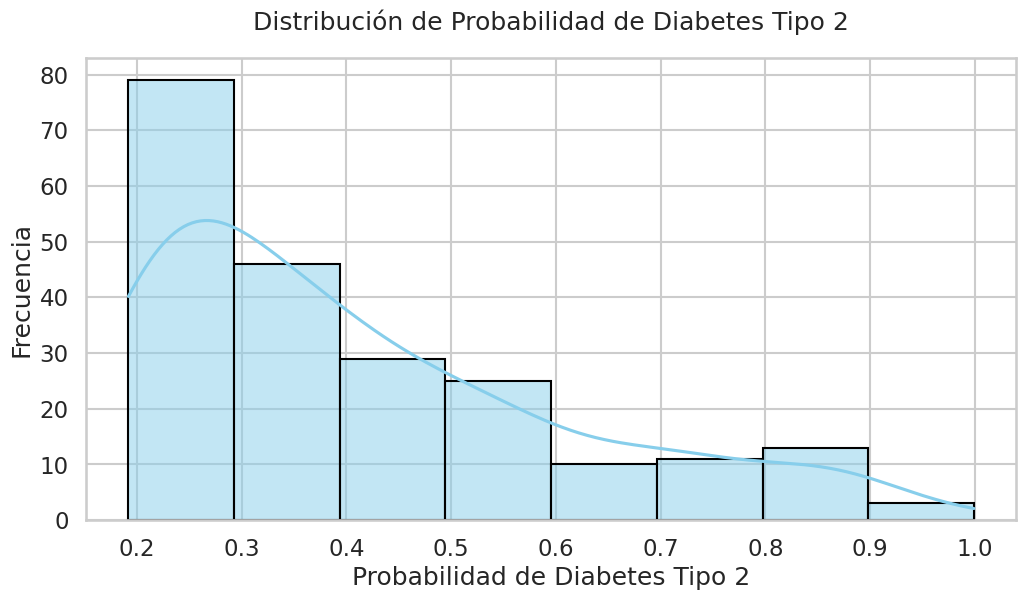

In [303]:
# Histograma de diabetes_type2_probability_value en pacientes no diabéticos (has_diabetes == False) y omitiendo los valores nulos y ceros
data_non_diabetics = data_non_diabetics[data_non_diabetics['diabetes_type2_probability_value'].notna() & (data_non_diabetics['diabetes_type2_probability_value'] > 0.19)].copy()

# Crear el histograma
plt.figure(figsize=(12, 6))
sns.histplot(
    data=data_non_diabetics,
    x='diabetes_type2_probability_value',
    bins=8,
    kde=True,
    color='skyblue',
    edgecolor='black'
)

# Personalizar el gráfico
plt.title('Distribución de Probabilidad de Diabetes Tipo 2', pad=20)
plt.xlabel('Probabilidad de Diabetes Tipo 2')
plt.ylabel('Frecuencia')



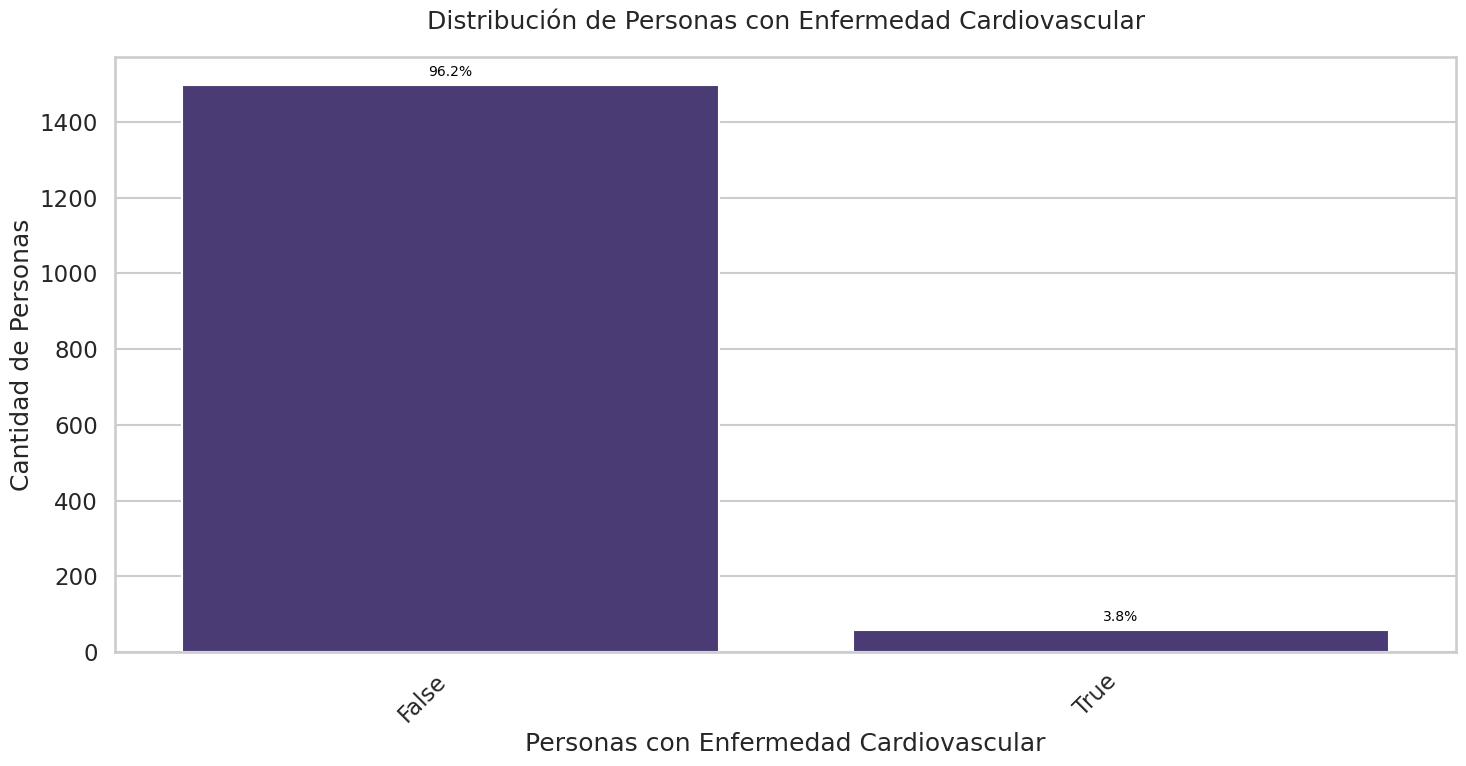

In [304]:
# Distribución de personas con Enfermedad Cardiovascular
plot_category_counts(
    data, 
    column='has_cardiovascular_disease', 
    title="Distribución de Personas con Enfermedad Cardiovascular", 
    xlabel="Personas con Enfermedad Cardiovascular", 
    ylabel="Cantidad de Personas", 
    figsize=(15,8), 
    rotation=45, 
    ha='right', 
    use_hue=False
)

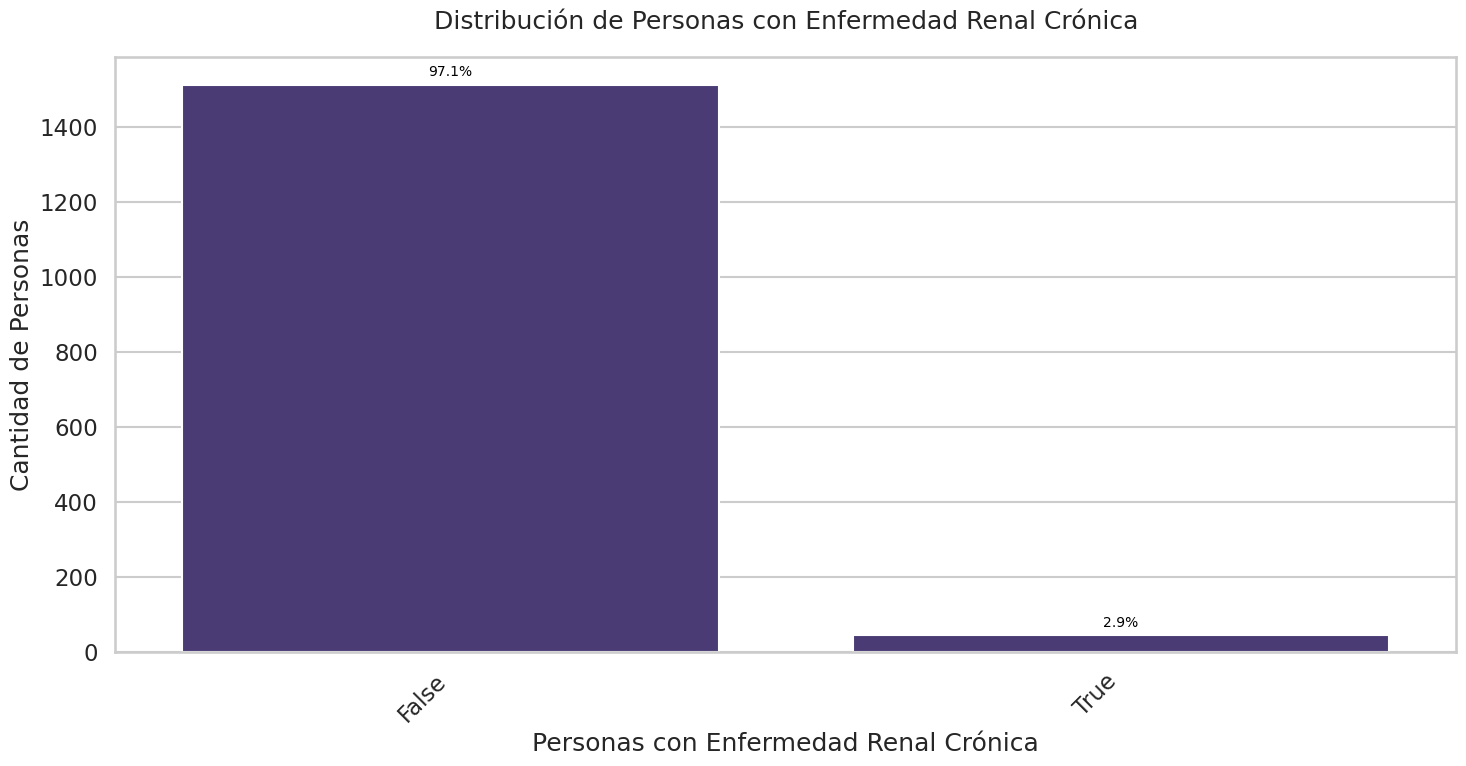

In [305]:
# Distribución de personas con Enfermedad Renal Crónica
plot_category_counts(
    data, 
    column='has_chronic_kidney_disease', 
    title="Distribución de Personas con Enfermedad Renal Crónica", 
    xlabel="Personas con Enfermedad Renal Crónica", 
    ylabel="Cantidad de Personas", 
    figsize=(15,8), 
    rotation=45, 
    ha='right', 
    use_hue=False
)

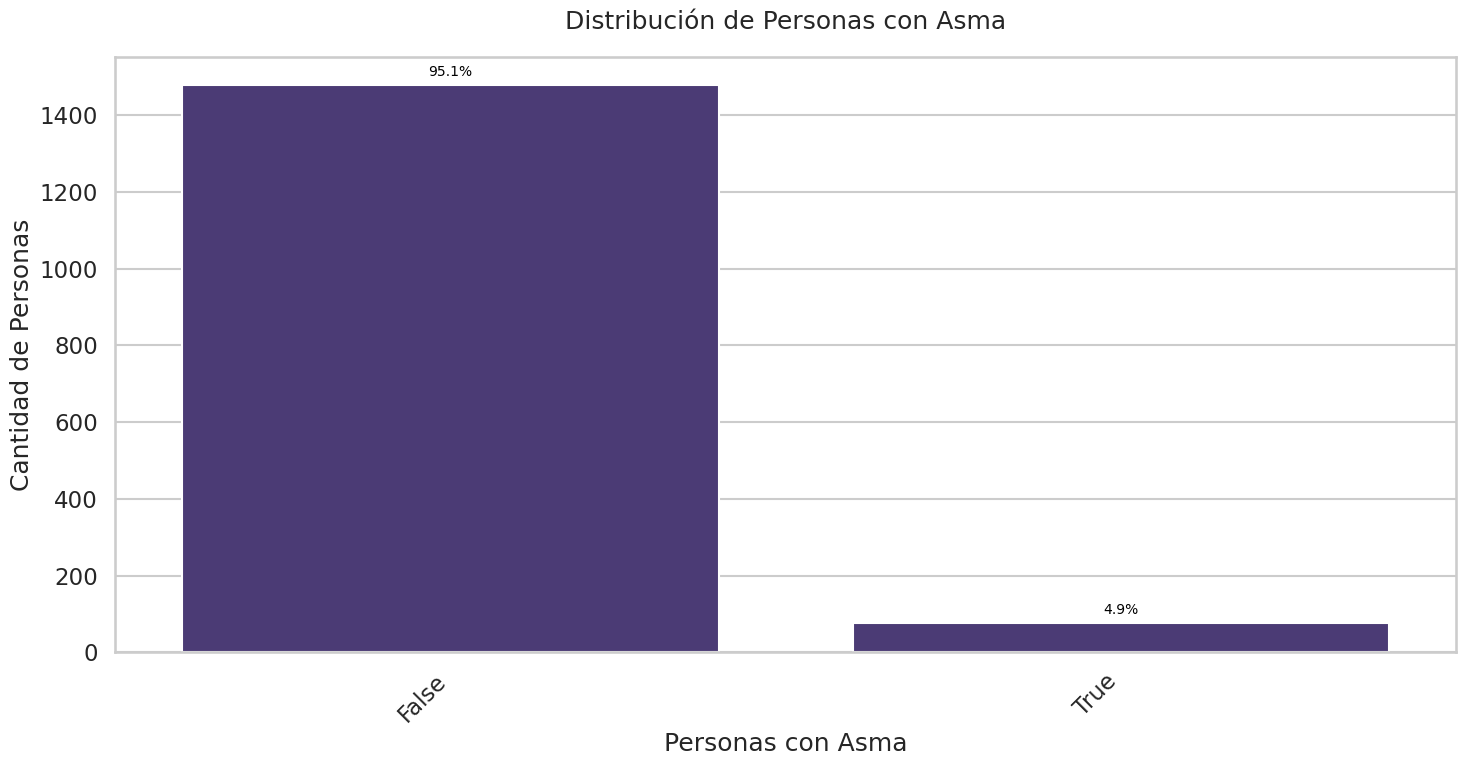

In [306]:
# Distribución de personas con Asma
plot_category_counts(
    data, 
    column='has_asthma', 
    title="Distribución de Personas con Asma", 
    xlabel="Personas con Asma", 
    ylabel="Cantidad de Personas", 
    figsize=(15,8), 
    rotation=45, 
    ha='right', 
    use_hue=False
)